# ANÁLISIS EXPLORATORIO DE DATOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import hashlib

import math



#1. El set de datos
Nuestra información se encuentra en los archivos (`Convocatoria Beca Talento 2023-2.xls`, Postul Matricul form 2023-2.xlsx)


In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
aspirante_2023_2 = "/gdrive/MyDrive/Colab Notebooks/Trabajo-Grado/Data/01-Convocatoria Beca Talento 2023-2.xlsx"
aspirante_2024_1 = "/gdrive/MyDrive/Colab Notebooks/Trabajo-Grado/Data/02-Convocatoria 20241 postulados y resultados.xlsx"
aspirante_2024_2 = "/gdrive/MyDrive/Colab Notebooks/Trabajo-Grado/Data/03-Postulados y resultados BT 20242.xlsx"

df_2023_2 = pd.read_excel(aspirante_2023_2, sheet_name="Consolidado aplicantes (703)")
#df_Mat2023_2 = pd.read_excel(matriculado_2023_2, sheet_name="Sheet1")
df_2024_1 = pd.read_excel(aspirante_2024_1, sheet_name="Hoja1")
df_2024_2 = pd.read_excel(aspirante_2024_2, sheet_name="Datos")



In [ ]:
# Mostrar las primeras filas del dataframe
df_2023_2.head()

,Fecha registrada,Resultado proceso selección,% beca aprobado final,Filtros comité,Observaciones,Consolidado estado candidato,Nombres y apellidos,Tipo de documento,Documento,Confirma tu número de documento:,...,F 4 - Ingresos,F5 - Nombres y Apellidos,F 5 - Parentesco,F) - 5 - Edad,F5 - Cargo / actividad,F- 5 - Institución / empresa,F 5 - Ingresos,Observaciones GF,Estas a un click de terminar.,Estado con la beca
0,2023-04-21 15:55:16.249000,Aprobado Talento,0.5,"Pasa a revisión ensayo, entrevista y ponderaci...",Aprobar beca talento,Se aprueba beca talento,Deisy Tatiana Zapata Alzate,CC,1.055832e+09,1.055832e+09,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Terminé,Aceptado
1,2023-04-21 23:06:15.709000,Aprobado JR10,1.0,"Pasa a revisión ensayo, entrevista y ponderaci...",Se postuló para beca James y quedó con el bene...,Se aprueba beca JR10,Johan Cano Cogollo,TI,1.011393e+09,1.011393e+09,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Terminé,Matriculado
2,2023-04-24 18:33:44.553000,Aprobado Talento,0.7,"Pasa a revisión ensayo, entrevista y ponderaci...",Aprobar beca talento,Se aprueba beca talento,Mariana Valderrama Castañeda,CC,1.033256e+09,1.033256e+09,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Terminé,Matriculado
3,2023-04-24 20:41:40.118000,Aprobado Talento,1.0,"Pasa a revisión ensayo, entrevista y ponderaci...",Aprobar beca talento,Se aprueba beca talento,VALENTINA QUINTERO QUINTANA,TI,1.025887e+09,1.025887e+09,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Terminé,Matriculado
4,2023-04-25 12:32:55.412000,Negada,NaN,No pasó a entrevista por ponderación académica...,No pasó a comité final por ponderación académi...,Ponderación académica,Manuel Alejandro Preciado Guevara,CC,1.109542e+09,1.109542e+09,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Mi madrastra al igual que mis hermanastros est...,Terminé,Negado


In [ ]:
# Realizamos el merge de ambos archivos
# Añadir la columna 'Cohorte' en cada DataFrame
df_2023_2['Cohorte'] = '2023_2'
df_2024_1['Cohorte'] = '2024_1'
df_2024_2['Cohorte'] = '2024_2'
# Identificar las columnas comunes
columnas_comunes = list(set(df_2023_2.columns).intersection(set(df_2024_1.columns)))

print("Columnas comunes:", columnas_comunes)

Columnas comunes: ['Madre - Cargo / Actividad', 'Madre - Profesión u oficio', 'Química -  11°', 'Cohorte', 'Documento', 'Nombre del programa', 'Madre - Vive (S/N)', 'F5 - Nombres y Apellidos', 'Estrato:', 'Familiar 1 - Parentesco', 'Padre - Empresa / Institución', 'F- 5 - Institución / empresa', 'Institución Educativa estudio', 'Matriculado EPIK', 'F 4 - Ingresos ', '% beca aprobado final', 'F 5 - Ingresos ', 'Lenguaje / Español 11° ', 'Departamento de Residencia', 'F 3 - Edad', 'Padre - Vive con el aspirante SI/NO', 'Observaciones Pruebas', 'Lenguaje / Español 10° ', 'Nombres y apellidos', 'Familiar 1 - Institución / empresa', 'Física -  10°', 'F4 - Parentesco', 'Tipo de programa', 'Madre - Edad', 'Padre - Cargo / Actividad', 'Correo', 'Dirección', 'Edad', 'Padre - Nombres y Apellidos', 'Tipo de documento', 'F 3 - Ingresos ', 'F2 - Nombres y Apellidos', 'Estudios de Educación Superior', 'Madre - Ingresos', 'Familiar 1 - Edad', 'Madre - Vive con el aspirante SI/NO', 'Física -  11°', 'E

In [ ]:
# Seleccionar solo las columnas comunes
df_2023_2_comunes = df_2023_2[columnas_comunes]
df_2024_1_comunes = df_2024_1[columnas_comunes]
df_2024_2_comunes = df_2024_2[columnas_comunes]

# Unir los DataFrames
df_unificado = pd.concat([df_2023_2_comunes, df_2024_1_comunes, df_2024_2_comunes], ignore_index=True)

# Filtrar el DataFrame unificado para conservar solo los registros con "Nombres y apellidos"
df_unificado = df_unificado[df_unificado['Documento'].notna() & (df_unificado['Documento'] != '')]

# Mostrar las primeras filas del DataFrame unificado para verificar
df_unificado.head()


,Madre - Cargo / Actividad,Madre - Profesión u oficio,Química - 11°,Cohorte,Documento,Nombre del programa,Madre - Vive (S/N),F5 - Nombres y Apellidos,Estrato:,Familiar 1 - Parentesco,...,Química - 10°,F4 - Edad,F 5 - Parentesco,Madre - Empresa / Institución,F) - 5 - Edad,Colegio,F 2 - Institución / empresa,Sexo biológico,Estado con la beca,Familiar 1 - Nombres y Apellidos
0,"Dueña, administradora, trabajadora",Comerciante,SUPERIOR 5,2023_2,1.055832e+09,NaN,SI,NaN,Estrato 2,Padrastro,...,SUPERIOR 5,NaN,NaN,Almacen DecorArte L.A,NaN,Escuela Normal Superior Claudina Munera,ESCUELA NORMAL SUPERIOR CLAUDINA MUNERA,Femenino,Aceptado,RUBEN DARIO DUQUE OSORIO
1,Ama de casa,Ama de casa,4.11,2023_2,1.011393e+09,NaN,SI,NaN,Estrato 1,Hermana,...,4.52,NaN,NaN,NaN,NaN,Institución Educativa Fe y Alegría La Cima,Institución Educativa Guillermo Gaviria Correa,Masculino,Matriculado,Dulce María Cano Cogollo
2,NaN,Ama de casa,4.5,2023_2,1.033256e+09,NaN,si,NaN,Estrato 3,NaN,...,4.1,NaN,NaN,NaN,NaN,Institucion educativa Yermo y Parres,NaN,Femenino,Matriculado,NaN
3,NaN,AMA DE CASA,4,2023_2,1.025887e+09,NaN,SI,NaN,Estrato 3,HERMANO,...,4.5,NaN,NaN,NaN,NaN,I.E. SANTA JUANA DE LESTONNAC,NaN,Femenino,Matriculado,MIGUEL ANGEL QUINTERO QUINTANA
4,NaN,NaN,3.6,2023_2,1.109542e+09,NaN,SI,NaN,Estrato 3,MADRASTRA,...,3.5,NaN,NaN,NaN,NaN,I.E. Maria Mediadora,NaN,Masculino,Negado,GLORIA PATRICIA MEJIA OCAMPO


#2. Limpieza de datos

In [ ]:
# Obtener el listado de las columnas del DataFrame
columnas = df_unificado.columns

# Convertir las columnas a una cadena separada por saltos de línea
columnas_str = '\n'.join(columnas)

# Imprimir el listado de las columnas para copiar y pegar
print(columnas_str)

Madre - Cargo / Actividad
Madre - Profesión u oficio
Química -  11°
Cohorte
Documento
Nombre del programa
Madre - Vive (S/N)
F5 - Nombres y Apellidos
Estrato:
Familiar 1 - Parentesco
Padre - Empresa / Institución
F- 5 - Institución / empresa
Institución Educativa estudio
Matriculado EPIK
F 4 - Ingresos 
% beca aprobado final
F 5 - Ingresos 
Lenguaje / Español 11° 
Departamento de Residencia
F 3 - Edad
Padre - Vive con el aspirante SI/NO
Observaciones Pruebas
Lenguaje / Español 10° 
Nombres y apellidos
Familiar 1 - Institución / empresa
Física -  10°
F4 - Parentesco
Tipo de programa
Madre - Edad
Padre - Cargo / Actividad
Correo
Dirección
Edad
Padre - Nombres y Apellidos
Tipo de documento
F 3 - Ingresos 
F2 - Nombres y Apellidos
Estudios de Educación Superior
Madre - Ingresos
Familiar 1 - Edad
Madre - Vive con el aspirante SI/NO
Física -  11°
Estado Otro Estudio(En curso, Finalizado)
Año graduación
Matemáticas - Grado 10°
Matemáticas -  11°
F 2 - Edad
Padre - Ingresos
Padre - Vive (S/N)


In [ ]:
# Ordenamos las columnas
nuevo_orden = ['Nombres y apellidos', 'Tipo de documento', 'Documento', 'Edad', 'Sexo biológico', 'Estado civil', 'Colegio', 'Tipo de IE', 'Año graduación', 'Municipio IE', 'Dpto IE', 'Física -  10°', 'Física -  11°', 'Química -  10°', 'Química -  11°', 'Matemáticas - Grado 10°', 'Matemáticas -  11°', 'Lenguaje / Español 10° ', 'Lenguaje / Español 11° ', 'Puntaje Saber 11', 'Pregrado al que aspiras', 'Estudios de Educación Superior', 'Tipo de programa', 'Nombre del programa', 'Institución Educativa estudio', 'Estado Otro Estudio(En curso, Finalizado)', 'Dirección', 'Barrio', 'Teléfono', 'Celular', 'Correo', 'Con cuántas personas vive', 'Departamento de Residencia', 'Ciudad de Residencia', 'Estrato:', 'La vivienda es', 'Padre - Nombres y Apellidos', 'Padre - Edad', 'Padre - Profesión u oficio', 'Padre - Cargo / Actividad', 'Padre - Empresa / Institución', 'Padre - Ingresos', 'Padre - Vive con el aspirante SI/NO', 'Padre - Vive (S/N)', 'Madre - Nombres y Apellidos', 'Madre - Edad', 'Madre - Profesión u oficio', 'Madre - Cargo / Actividad', 'Madre - Empresa / Institución', 'Madre - Ingresos', 'Madre - Vive con el aspirante SI/NO', 'Madre - Vive (S/N)', 'Total ingresos padres', 'Familiar 1 - Nombres y Apellidos', 'Familiar 1 - Parentesco', 'Familiar 1 - Edad', 'Familiar 1 - Cargo / actividad', 'Familiar 1 - Institución / empresa', 'Familiar 1 - Ingresos', 'F2 - Nombres y Apellidos', 'F2 - Parentesco', 'F 2 - Edad', 'F2 - Cargo / actividad', 'F 2 - Institución / empresa', 'F 2 - Ingresos ', 'F 3 - Nombres y Apellidos', 'F3 - Parentesco', 'F 3 - Edad', 'F3 - Cargo / actividad', 'F3 - Institución / empresa', 'F 3 - Ingresos ', 'F- 4 - Nombres y Apellidos', 'F4 - Parentesco', 'F4 - Edad', 'F- 4 - Cargo / actividad', 'F 4 - Institución / empresa', 'F 4 - Ingresos ', 'F5 - Nombres y Apellidos', 'F 5 - Parentesco', 'F) - 5 - Edad', 'F5 - Cargo / actividad', 'F- 5 - Institución / empresa', 'F 5 - Ingresos ',  'Estado con la beca','Resultado proceso selección', '% beca aprobado final', 'Cohorte']
# Reordenar las columnas del DataFrame
df_unificado = df_unificado[nuevo_orden]

# Mostrar las primeras filas del DataFrame ordenado para verificar
df_unificado.head()

,Nombres y apellidos,Tipo de documento,Documento,Edad,Sexo biológico,Estado civil,Colegio,Tipo de IE,Año graduación,Municipio IE,...,F5 - Nombres y Apellidos,F 5 - Parentesco,F) - 5 - Edad,F5 - Cargo / actividad,F- 5 - Institución / empresa,F 5 - Ingresos,Estado con la beca,Resultado proceso selección,% beca aprobado final,Cohorte
0,Deisy Tatiana Zapata Alzate,CC,1.055832e+09,17.0,Femenino,Soltero,Escuela Normal Superior Claudina Munera,Pública,2022.0,AGUADAS,...,NaN,NaN,NaN,NaN,NaN,0.0,Aceptado,Aprobado Talento,0.5,2023_2
1,Johan Cano Cogollo,TI,1.011393e+09,17.0,Masculino,Soltero,Institución Educativa Fe y Alegría La Cima,Pública,2022.0,Medellín,...,NaN,NaN,NaN,NaN,NaN,0.0,Matriculado,Aprobado JR10,1.0,2023_2
2,Mariana Valderrama Castañeda,CC,1.033256e+09,19.0,Femenino,Soltero,Institucion educativa Yermo y Parres,Pública,2020.0,Medellín,...,NaN,NaN,NaN,NaN,NaN,0.0,Matriculado,Aprobado Talento,0.7,2023_2
3,VALENTINA QUINTERO QUINTANA,TI,1.025887e+09,17.0,Femenino,Soltero,I.E. SANTA JUANA DE LESTONNAC,Pública,2022.0,MEDELLIN,...,NaN,NaN,NaN,NaN,NaN,0.0,Matriculado,Aprobado Talento,1.0,2023_2
4,Manuel Alejandro Preciado Guevara,CC,1.109542e+09,18.0,Masculino,Soltero,I.E. Maria Mediadora,Pública,2022.0,Sabaneta,...,NaN,NaN,NaN,NaN,NaN,0.0,Negado,Negada,NaN,2023_2


In [ ]:
df_unificado.info()

##2.1 Columnas irrelevantes e información sensible

Una columna irrelevante puede ser:

- **Columnas que no contiene información relevante para el problema que queremos resolver**.
- **Columnas categórica con concentración excesiva en una sola categoría**.
- **Columnas con alta cardinalidad**
- **Columnas con alto porcentaje de valores nulos**
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

In [ ]:
#Estudiante Duplicado
estudiante = df_unificado.loc[df_unificado['Documento'] == 1079535019]
df_unificado.drop(2398, inplace=True)

In [ ]:
#Eliminamos las columnas que tienen información sensible y que no vamos a usar durante el proceso
#tambien eliminanos todos los datos de familiares ya que tienen muchos datos nulos
df_unificado = df_unificado.drop(columns=['Nombres y apellidos'])
df_unificado = df_unificado.drop(columns=['Tipo de documento'])
df_unificado = df_unificado.drop(columns=['Documento'])
df_unificado = df_unificado.drop(columns=['Dirección'])
df_unificado = df_unificado.drop(columns=['Celular'])
df_unificado = df_unificado.drop(columns=['Correo'])
df_unificado = df_unificado.drop(columns=['Teléfono'])
df_unificado = df_unificado.drop(columns=['Padre - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['Madre - Nombres y Apellidos'])
#9 columnas

df_unificado = df_unificado.drop(columns=['Familiar 1 - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['Familiar 1 - Parentesco'])
df_unificado = df_unificado.drop(columns=['Familiar 1 - Edad'])
df_unificado = df_unificado.drop(columns=['Familiar 1 - Cargo / actividad'])
df_unificado = df_unificado.drop(columns=['Familiar 1 - Institución / empresa'])

df_unificado = df_unificado.drop(columns=['F2 - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['F2 - Parentesco'])
df_unificado = df_unificado.drop(columns=['F 2 - Edad'])
df_unificado = df_unificado.drop(columns=['F2 - Cargo / actividad'])
df_unificado = df_unificado.drop(columns=['F 2 - Institución / empresa'])

df_unificado = df_unificado.drop(columns=['F 3 - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['F3 - Parentesco'])
df_unificado = df_unificado.drop(columns=['F 3 - Edad'])
df_unificado = df_unificado.drop(columns=['F3 - Cargo / actividad'])
df_unificado = df_unificado.drop(columns=['F3 - Institución / empresa'])

df_unificado = df_unificado.drop(columns=['F- 4 - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['F4 - Parentesco'])
df_unificado = df_unificado.drop(columns=['F4 - Edad'])
df_unificado = df_unificado.drop(columns=['F- 4 - Cargo / actividad'])
df_unificado = df_unificado.drop(columns=['F 4 - Institución / empresa'])

df_unificado = df_unificado.drop(columns=['F5 - Nombres y Apellidos'])
df_unificado = df_unificado.drop(columns=['F 5 - Parentesco'])
df_unificado = df_unificado.drop(columns=['F) - 5 - Edad'])
df_unificado = df_unificado.drop(columns=['F5 - Cargo / actividad'])
df_unificado = df_unificado.drop(columns=['F- 5 - Institución / empresa'])

# Mostrar las primeras filas para verificar
#print(df_unificado.head())

In [ ]:
df_unificado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 3827
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Edad                                       3813 non-null   float64
 1   Sexo biológico                             3813 non-null   object 
 2   Estado civil                               3813 non-null   object 
 3   Colegio                                    3813 non-null   object 
 4   Tipo de IE                                 3813 non-null   object 
 5   Año graduación                             3813 non-null   float64
 6   Municipio IE                               3813 non-null   object 
 7   Dpto IE                                    3813 non-null   object 
 8   Física -  10°                              3453 non-null   object 
 9   Física -  11°                              3689 non-null   object 
 10  Química -  10°               

In [ ]:
# Calcula el número de valores nulos por columna
valores_nulos = df_unificado.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos = (valores_nulos / len(df_unificado)) * 100

# Crea un DataFrame con la cantidad y el porcentaje de nulos
tabla_nulos = pd.DataFrame({
    'Cantidad de Nulos': valores_nulos,
    'Porcentaje de Nulos': porcentaje_nulos
})

# Ordenar la tabla por porcentaje de nulos de manera descendente
tabla_nulos = tabla_nulos.sort_values(by='Porcentaje de Nulos', ascending=False)

# Seleccionar solo las 10 columnas con más nulos
top_nulos = tabla_nulos.head(50)

# Muestra la tabla resultante
print(top_nulos)

                                           Cantidad de Nulos  \
Tipo de programa                                        3030   
Estado Otro Estudio(En curso, Finalizado)               3030   
Institución Educativa estudio                           3030   
Nombre del programa                                     3030   
% beca aprobado final                                   2292   
Estado con la beca                                      1989   
Padre - Empresa / Institución                           1558   
Madre - Empresa / Institución                           1369   
Padre - Cargo / Actividad                               1201   
Padre - Profesión u oficio                               883   
Padre - Edad                                             827   
Madre - Cargo / Actividad                                793   
Padre - Vive con el aspirante SI/NO                      774   
Padre - Ingresos                                         372   
Física -  10°                           

In [ ]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 3827
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Edad                                       3813 non-null   float64
 1   Sexo biológico                             3813 non-null   object 
 2   Estado civil                               3813 non-null   object 
 3   Colegio                                    3813 non-null   object 
 4   Tipo de IE                                 3813 non-null   object 
 5   Año graduación                             3813 non-null   float64
 6   Municipio IE                               3813 non-null   object 
 7   Dpto IE                                    3813 non-null   object 
 8   Física -  10°                              3453 non-null   object 
 9   Física -  11°                              3689 non-null   object 
 10  Química -  10°               

In [ ]:
# Ver todos los estados únicos en la columna 'Estado con la beca'
estados_unicos = df_unificado['Estado con la beca'].unique()

# Mostrar los estados únicos
print(estados_unicos)


# Diccionario de mapeo para homologar los estados
mapeo_estado_beca = {
    'Negado': 'No se aprueba la BECA',
    'No uso beca': 'Aceptado: No uso beca',
    'Aceptado': 'Aceptado: No uso beca',
    'Activo': 'Aceptado: Matriculado en la Universidad',
    'Matriculado': 'Aceptado: Matriculado en la Universidad',
    'Se congela beca para 20242':'Aceptado: Matriculado en la Universidad',
    'Se congela beca para 20251': 'Aceptado: Matriculado en la Universidad'
}

# Aplicar el mapeo a la columna 'Estado con la beca'
df_unificado['Estado con la beca'] = df_unificado['Estado con la beca'].map(mapeo_estado_beca)


['Aceptado' 'Matriculado' 'Negado' 'Activo' nan 'No uso beca'
 'Se congela beca para 20242' 'Se congela beca para 20251']


In [ ]:
df_unificado['Estado con la beca'].unique()

array(['Aceptado: No uso beca', 'Aceptado: Matriculado en la Universidad',
       'No se aprueba la BECA', nan], dtype=object)

In [ ]:
df_unificado.describe()

,Edad,Año graduación,Con cuántas personas vive,Padre - Edad,Padre - Ingresos,Madre - Edad,Madre - Ingresos,Total ingresos padres,Familiar 1 - Ingresos,F 2 - Ingresos,F 3 - Ingresos,F 4 - Ingresos,F 5 - Ingresos,% beca aprobado final
count,3813.000000,3813.000000,3813.000000,2986.000000,3.441000e+03,3699.000000,3.760000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,1521.000000
mean,19.221645,2020.605298,2.873328,50.596450,2.177244e+06,46.432549,1.740398e+06,3.681037e+06,4.983135e+05,1.901229e+05,6.823849e+04,4.024826e+04,2.347178e+04,0.547995
std,4.120174,32.782460,1.363193,8.276639,2.937013e+06,7.435170,4.460947e+06,5.332718e+06,1.491145e+06,7.352228e+05,4.574406e+05,3.349412e+05,3.067677e+05,0.181797
min,2.000000,11.000000,0.000000,27.000000,0.000000e+00,16.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.200000
25%,17.000000,2021.000000,2.000000,44.000000,0.000000e+00,41.000000,0.000000e+00,1.300000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.400000
50%,18.000000,2023.000000,3.000000,50.000000,1.400000e+06,46.000000,1.200000e+06,2.580000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.500000
75%,19.005479,2023.000000,4.000000,56.000000,3.000000e+06,52.000000,2.349222e+06,4.540000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.700000
max,53.695890,2024.000000,11.000000,86.000000,4.003500e+07,81.000000,2.420000e+08,2.420000e+08,5.000000e+07,1.160000e+07,1.400000e+07,8.000000e+06,1.211500e+07,1.000000


In [ ]:
# Asegúrate de que todo el texto esté en minúsculas para evitar errores de comparación
df_unificado[ 'Padre - Vive (S/N)'] = df_unificado[ 'Padre - Vive (S/N)'].str.lower()
df_unificado[ 'Madre - Vive (S/N)'] = df_unificado[ 'Madre - Vive (S/N)'].str.lower()

# Reemplazar los valores según las condiciones
df_unificado[ 'Padre - Vive (S/N)'] = df_unificado[ 'Padre - Vive (S/N)'].replace({
     's': 'Si', 'si': 'Si', 'y': 'Si', 'sí': 'Si','si ': 'Si','sí ': 'Si','si esta vivo': 'Si', 'vive ': 'Si' ,'vive': 'Si',
    'n': 'No', 'no': 'No', 'no se': 'No', 'fallecido': 'No', 'no registra': 'No',
    'no ': 'No', 'no vive': 'No', 'desconocido': 'No', 'sin información ': 'No', 'no, fallecido': 'No', 'sin información': 'No',
    'desconocido.': 'No','____': 'No','.': 'No','nan': 'No','no registra ': 'No','no sabe de el': 'No', '-': 'No',  'no sabe de el': 'No'
})

df_unificado[ 'Madre - Vive (S/N)'] = df_unificado[ 'Madre - Vive (S/N)'].replace({
    's': 'Si', 'si': 'Si', 'y': 'Si', 'sí': 'Si','si ': 'Si','sí ': 'Si','si esta vivo': 'Si', 'vive ': 'Si' ,'vive': 'Si',
    'si esta viva': 'Si', 'medellín, antioquia': 'Si', 's ': 'Si',
    'n': 'No', 'no': 'No', 'no se': 'No', 'fallecido': 'No', 'no registra': 'No', 'no, fallecida':'No',
    'no ': 'No', 'no vive': 'No', 'desconocido': 'No', 'sin información ': 'No', 'no, fallecido': 'No', 'sin información': 'No',
    'desconocido.': 'No','____': 'No','.': 'No','nan': 'No','no registra ': 'No','no sabe de el': 'No', '-': 'No',  'no sabe de el': 'No'
})


df_unificado[ 'Padre - Vive con el aspirante SI/NO'] = df_unificado['Padre - Vive con el aspirante SI/NO'].replace({
    's': 'Si', 'si': 'Si', 'y': 'Si', 'sí': 'Si','si ': 'Si','sí ': 'Si','si esta vivo': 'Si', 'vive ': 'Si' ,'vive': 'Si',
    'si esta viva': 'Si', 'medellín, antioquia': 'Si', 's ': 'Si',
    'n': 'No', 'no': 'No', 'no se': 'No', 'fallecido': 'No', 'no registra': 'No', 'no, fallecida':'No',
    'no ': 'No', 'no vive': 'No', 'desconocido': 'No', 'sin información ': 'No', 'no, fallecido': 'No', 'sin información': 'No',
    'desconocido.': 'No','____': 'No','.': 'No','nan': 'No','no registra ': 'No','no sabe de el': 'No', '-': 'No',  'no sabe de el': 'No',
    'NO': 'No', 'SI': 'Si', 'na': 'No', 'N': 'No', 'No ': 'No', '¨SI': 'Si', 'FALLECIDO': 'No',
       'Sí': 'Si', 'SI ': 'Si', 'S': 'Si', 'Si ': 'Si', 'Fallecido': 'No', 'NO ': 'No', 'Sí ': 'Si','SÍ ' : 'Si',
       'No reside conmigo': 'No', 'No3': 'No', 'nnnnnnnnnnno': 'No', 'SÍ': 'Si', 'no actualmente': 'No'


})

df_unificado['Madre - Vive con el aspirante SI/NO'] = df_unificado['Madre - Vive con el aspirante SI/NO'].replace({
    's': 'Si', 'si': 'Si', 'y': 'Si', 'sí': 'Si','si ': 'Si','sí ': 'Si','si esta vivo': 'Si', 'vive ': 'Si' ,'vive': 'Si',
    'si esta viva': 'Si', 'medellín, antioquia': 'Si', 's ': 'Si',
    'n': 'No', 'no': 'No', 'no se': 'No', 'fallecido': 'No', 'no registra': 'No', 'no, fallecida':'No',
    'no ': 'No', 'no vive': 'No', 'desconocido': 'No', 'sin información ': 'No', 'no, fallecido': 'No', 'sin información': 'No',
    'desconocido.': 'No','____': 'No','.': 'No','nan': 'No','no registra ': 'No','no sabe de el': 'No', '-': 'No',  'no sabe de el': 'No',
    'SI': 'Si', 'Sí': 'Si','SI ': 'Si', 'S': 'Si', 'Si ': 'Si', 'Sí ': 'Si', 'SÍ': 'Si', 'SI.': 'Si', 'sii': 'Si',
    'NO actualmente': 'No', 'NO': 'No', 'na': 'No', 'N': 'No', 'NO ': 'No', 'No ': 'No', 'No vivo con la madre': 'No'
})


In [ ]:
df_unificado[ 'Padre - Vive con el aspirante SI/NO'].unique()


array(['No', 'Si', nan], dtype=object)

In [ ]:
df_unificado[ 'Madre - Vive con el aspirante SI/NO'].unique()

array(['Si', 'No', nan], dtype=object)

Identificacion de variables con alta concentracion en alguna de sus categorias

In [ ]:
# Define un umbral para la concentración
threshold = 0.70

# Filtrar solo las columnas categóricas de tu DataFrame
columnas_categoricas = df_unificado.select_dtypes(include=['object', 'category']).columns

# Crear un diccionario para almacenar los resultados
columnas_alta_concentracion = {}

# Iterar sobre las columnas categóricas
for col in columnas_categoricas:
    # Calcular las proporciones de cada categoría
    proporciones = df_unificado[col].value_counts(normalize=True)

    # Verificar si alguna categoría tiene una concentración mayor al umbral
    if (proporciones > threshold).any():
        # Guardar el valor máximo de concentración
        columnas_alta_concentracion[col] = proporciones.max()

# Mostrar las columnas con alta concentración
if columnas_alta_concentracion:
    print("Columnas con alta concentración (>70%) en una categoría:")
    for col, max_value in columnas_alta_concentracion.items():
        print(f"{col}: {max_value:.2%}")
else:
    print("No se encontraron columnas con alta concentración.")


Columnas con alta concentración (>70%) en una categoría:
Estado civil: 97.25%
Estudios de Educación Superior: 79.46%
Departamento de Residencia: 83.84%
Padre - Vive (S/N): 79.70%
Madre - Vive con el aspirante SI/NO: 83.60%
Madre - Vive (S/N): 97.09%


In [ ]:
import pandas as pd
import numpy as np

# Función para clasificar valores numéricos en bajo, medio, alto
def clasificar_valor(valor):
    if pd.isna(valor) or valor == 'N/A' or valor == 'na':
        return 'Medio'
    elif isinstance(valor, (int, float)):
      # rango de 0 a 5
        if valor <= 5:
          if valor < 3:
              return 'Bajo'
          elif 3 <= valor <= 4:
              return 'Medio'
          else:
              return 'Alto'
# rango de 0 a 10
        elif valor >5 and valor <=10:
          if valor < 6:
              return 'Bajo'
          elif 6 <= valor <= 8:
              return 'Medio'
          else:
              return 'Alto'
# rango de 0 a 100
        elif valor >10 and valor <=100:
          if valor < 60:
              return 'Bajo'
          elif 60 <= valor <= 80:
              return 'Medio'
          else:
              return 'Alto'
    elif isinstance(valor, str):
        valor = valor.lower()
        if valor in ['SUPERIOR', 'SOBRESALIENTE', 'ALTO', 'S','SUPERIOR 5']:
            return 'Alto'
        elif valor in ['BASICO', 'BÁSICO', 'B', 'DESEMPEÑO BÁSICO','INSUFICIENTE', 'BUENO']:
            return 'Bajo'
        else:
            return 'Medio'
    else:
        return 'Medio'


In [ ]:
df_unificado['Física -  10°'] = df_unificado['Física -  10°'].str.strip().str.upper()
df_unificado['Física -  11°'] = df_unificado['Física -  11°'].str.strip().str.upper()
df_unificado['Química -  10°'] = df_unificado['Química -  10°'].str.strip().str.upper()
df_unificado['Química -  11°'] = df_unificado['Química -  11°'].str.strip().str.upper()
df_unificado['Matemáticas - Grado 10°'] = df_unificado['Matemáticas - Grado 10°'].str.strip().str.upper()
df_unificado['Matemáticas -  11°'] = df_unificado['Matemáticas -  11°'].str.strip().str.upper()
df_unificado['Lenguaje / Español 10° '] = df_unificado['Lenguaje / Español 10° '].str.strip().str.upper()
df_unificado['Lenguaje / Español 11° '] = df_unificado['Lenguaje / Español 11° '].str.strip().str.upper()

# Aplicar la función de clasificación a la lista de datos
df_unificado['Física -  10°'] = df_unificado['Física -  10°'].apply(clasificar_valor)
df_unificado['Física -  11°'] = df_unificado['Física -  11°'].apply(clasificar_valor)
df_unificado['Química -  10°'] = df_unificado['Química -  10°'].apply(clasificar_valor)
df_unificado['Química -  11°'] = df_unificado['Química -  11°'].apply(clasificar_valor)
df_unificado['Matemáticas - Grado 10°'] = df_unificado['Matemáticas - Grado 10°'].apply(clasificar_valor)
df_unificado['Matemáticas -  11°'] = df_unificado['Matemáticas -  11°'].apply(clasificar_valor)
df_unificado['Lenguaje / Español 10° '] = df_unificado['Lenguaje / Español 10° '].apply(clasificar_valor)
df_unificado['Lenguaje / Español 11° '] = df_unificado['Lenguaje / Español 11° '].apply(clasificar_valor)


# Convertir a DataFrame para visualizar mejor
#df = pd.DataFrame(clasificaciones, columns=['Física -  10°'])
df_unificado.head()

,Edad,Sexo biológico,Estado civil,Colegio,Tipo de IE,Año graduación,Municipio IE,Dpto IE,Física - 10°,Física - 11°,...,Total ingresos padres,Familiar 1 - Ingresos,F 2 - Ingresos,F 3 - Ingresos,F 4 - Ingresos,F 5 - Ingresos,Estado con la beca,Resultado proceso selección,% beca aprobado final,Cohorte
0,17.0,Femenino,Soltero,Escuela Normal Superior Claudina Munera,Pública,2022.0,AGUADAS,Caldas,Medio,Medio,...,5000000.0,4000000.0,0.0,0.0,0.0,0.0,Aceptado: No uso beca,Aprobado Talento,0.5,2023_2
1,17.0,Masculino,Soltero,Institución Educativa Fe y Alegría La Cima,Pública,2022.0,Medellín,Antioquia,Medio,Medio,...,1160000.0,0.0,0.0,0.0,0.0,0.0,Aceptado: Matriculado en la Universidad,Aprobado JR10,1.0,2023_2
2,19.0,Femenino,Soltero,Institucion educativa Yermo y Parres,Pública,2020.0,Medellín,Antioquia,Medio,Medio,...,3700000.0,0.0,0.0,0.0,0.0,0.0,Aceptado: Matriculado en la Universidad,Aprobado Talento,0.7,2023_2
3,17.0,Femenino,Soltero,I.E. SANTA JUANA DE LESTONNAC,Pública,2022.0,MEDELLIN,ANTIOQUIA,Medio,Medio,...,1600000.0,0.0,0.0,0.0,0.0,0.0,Aceptado: Matriculado en la Universidad,Aprobado Talento,1.0,2023_2
4,18.0,Masculino,Soltero,I.E. Maria Mediadora,Pública,2022.0,Sabaneta,Antioquia,Medio,Medio,...,3400000.0,0.0,0.0,0.0,0.0,0.0,No se aprueba la BECA,Negada,NaN,2023_2


In [ ]:
# más del 80% concentrado en una de las categorías para las siguientes tres variables.
df_unificado = df_unificado.drop(columns=['Estado civil'])
df_unificado = df_unificado.drop(columns=['Madre - Vive con el aspirante SI/NO'])
df_unificado = df_unificado.drop(columns=['Madre - Vive (S/N)'])
df_unificado = df_unificado.drop(columns=['Padre - Vive (S/N)'])
df_unificado = df_unificado.drop(columns=['Estudios de Educación Superior'])
#df_unificado = df_unificado.drop(columns=['Departamento de Residencia'])

# eliminamos, se utiliza para identificar el semestre al que aspiran ingresar. No aporta al modelo
df_unificado = df_unificado.drop(columns=['Cohorte'])

# no aporta información ya que solo vamos a tomar para nuestro proceso los aspirantes que fueron aceptados.
df_unificado = df_unificado.drop(columns=['Resultado proceso selección'])


In [ ]:
df_unificado[ 'Ingreso_Familiares'] =df_unificado['Familiar 1 - Ingresos'] + df_unificado['F 2 - Ingresos '] + df_unificado['F 3 - Ingresos '] + df_unificado['F 4 - Ingresos '] + df_unificado['F 5 - Ingresos ']

df_unificado = df_unificado.drop(columns=['Familiar 1 - Ingresos'])
df_unificado = df_unificado.drop(columns=['F 2 - Ingresos '])
df_unificado = df_unificado.drop(columns=['F 3 - Ingresos '])
df_unificado = df_unificado.drop(columns=['F 4 - Ingresos '])
df_unificado = df_unificado.drop(columns=['F 5 - Ingresos '])

In [ ]:
## Eliminamos el TOP de nulos
df_unificado = df_unificado.drop(columns=['Estado Otro Estudio(En curso, Finalizado)'])
df_unificado = df_unificado.drop(columns=['Institución Educativa estudio'])
df_unificado = df_unificado.drop(columns=['Nombre del programa'])
df_unificado = df_unificado.drop(columns=['Tipo de programa'])
df_unificado = df_unificado.drop(columns=['Padre - Empresa / Institución'])
df_unificado = df_unificado.drop(columns=['Madre - Empresa / Institución'])
df_unificado = df_unificado.drop(columns=['Padre - Cargo / Actividad'])
df_unificado = df_unificado.drop(columns=['Padre - Profesión u oficio'])
df_unificado = df_unificado.drop(columns=['Madre - Cargo / Actividad'])
df_unificado = df_unificado.drop(columns=['Madre - Profesión u oficio'])
df_unificado = df_unificado.drop(columns=['Padre - Edad'])
df_unificado = df_unificado.drop(columns=['Madre - Edad'])

In [ ]:
 # Filtramos los estudiantes que vamos revisar en nuestro trabajo, basado en los valores de 'Estado con la beca'
estados_filtrados = ['Aceptado: No uso beca','Aceptado: Matriculado en la Universidad']
df_Aceptados = df_unificado[df_unificado['Estado con la beca'].isin(estados_filtrados)]


In [ ]:
# Revisar valores únicos
#print(df_unificado['Madre - Edad'].unique())
#print(df_unificado['Padre - Edad'].unique())

print(df_Aceptados['Puntaje Saber 11'].unique())
# Reemplazar valores no válidos con NaN
df_Aceptados['Puntaje Saber 11'] = df_Aceptados['Puntaje Saber 11'].replace(['-', ' ', 'NaN'], np.nan)
df_Aceptados['Puntaje Saber 11']= pd.to_numeric(df_Aceptados['Puntaje Saber 11'], errors='coerce')


[323.0 350.0 336.0 337.0 360.0 305.0 328.0 340.0 342.0 365.0 344.0 358.0
 362.0 348.0 335.0 314.0 332.0 309.0 322.0 341.0 319.0 355.0 325.0 320.0
 333.0 381.0 311.0 313.0 372.0 316.0 300.0 310.0 315.0 352.0 371.0 324.0
 308.0 395.0 326.0 327.0 359.0 303.0 364.0 345.0 329.0 357.0 363.0 301.0
 356.0 317.0 331.0 330.0 351.0 307.0 380.0 368.0 347.0 366.0 304.0 318.0
 411.0 339.0 302.0 433.0 312.0 343.0 377.0 353.0 346.0 338.0 386.0 378.0
 349.0 369.0 354.0 392.0 419.0 306.0 370.0 374.0 334.0 390.0 321.0 375.0
 318.125 373.0 367.0 403.0 388.0 420.0 421.0 427.0 400.0 387.0 408.0 407.0
 361.0 398.0 379.0 389.0 415.0 60.0 382.0 413.0 384.0 394.0 418.0 391.0
 376.0 414.0 397.0 404.0 393.0 416.0 401.0 383.0 399.0 441 424 385 406 405
 '327' '334']


<ipython-input-98-cc907557bf69>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['Puntaje Saber 11'] = df_Aceptados['Puntaje Saber 11'].replace(['-', ' ', 'NaN'], np.nan)
<ipython-input-98-cc907557bf69>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['Puntaje Saber 11']= pd.to_numeric(df_Aceptados['Puntaje Saber 11'], errors='coerce')


In [ ]:
df_Aceptados['Puntaje Saber 11'].fillna(df_Aceptados['Puntaje Saber 11'].mean(), inplace=True)
print(df_Aceptados['Puntaje Saber 11'].unique())
# Verificar los tipos de datos

print(df_Aceptados[['Puntaje Saber 11']].dtypes)

[323.    350.    336.    337.    360.    305.    328.    340.    342.
 365.    344.    358.    362.    348.    335.    314.    332.    309.
 322.    341.    319.    355.    325.    320.    333.    381.    311.
 313.    372.    316.    300.    310.    315.    352.    371.    324.
 308.    395.    326.    327.    359.    303.    364.    345.    329.
 357.    363.    301.    356.    317.    331.    330.    351.    307.
 380.    368.    347.    366.    304.    318.    411.    339.    302.
 433.    312.    343.    377.    353.    346.    338.    386.    378.
 349.    369.    354.    392.    419.    306.    370.    374.    334.
 390.    321.    375.    318.125 373.    367.    403.    388.    420.
 421.    427.    400.    387.    408.    407.    361.    398.    379.
 389.    415.     60.    382.    413.    384.    394.    418.    391.
 376.    414.    397.    404.    393.    416.    401.    383.    399.
 441.    424.    385.    406.    405.   ]
Puntaje Saber 11    float64
dtype: object


<ipython-input-99-195df019ad64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aceptados['Puntaje Saber 11'].fillna(df_Aceptados['Puntaje Saber 11'].mean(), inplace=True)
<ipython-input-99-195df019ad64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['Puntaje Saber 11'].fillna(df_Aceptados['Puntaje Saber 11'].mean(), inplace

In [ ]:
df_Aceptados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 0 to 3827
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Edad                                 1521 non-null   float64
 1   Sexo biológico                       1521 non-null   object 
 2   Colegio                              1521 non-null   object 
 3   Tipo de IE                           1521 non-null   object 
 4   Año graduación                       1521 non-null   float64
 5   Municipio IE                         1521 non-null   object 
 6   Dpto IE                              1521 non-null   object 
 7   Física -  10°                        1521 non-null   object 
 8   Física -  11°                        1521 non-null   object 
 9   Química -  10°                       1521 non-null   object 
 10  Química -  11°                       1521 non-null   object 
 11  Matemáticas - Grado 10°            

#2. Análisis exploratorio


Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir


##2.1 Análisis de cada variable de manera individual



##2.2 Análisis de cada variable Categórica


##2.2.1 Homologamos la columna "Estados de la beca" para que todos tengan los mismos valores

<Axes: >

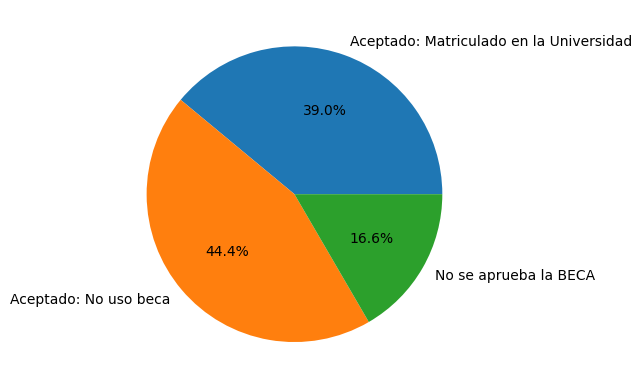

In [ ]:
df_unificado.groupby('Estado con la beca').size().plot(kind='pie', autopct='%1.1f%%')

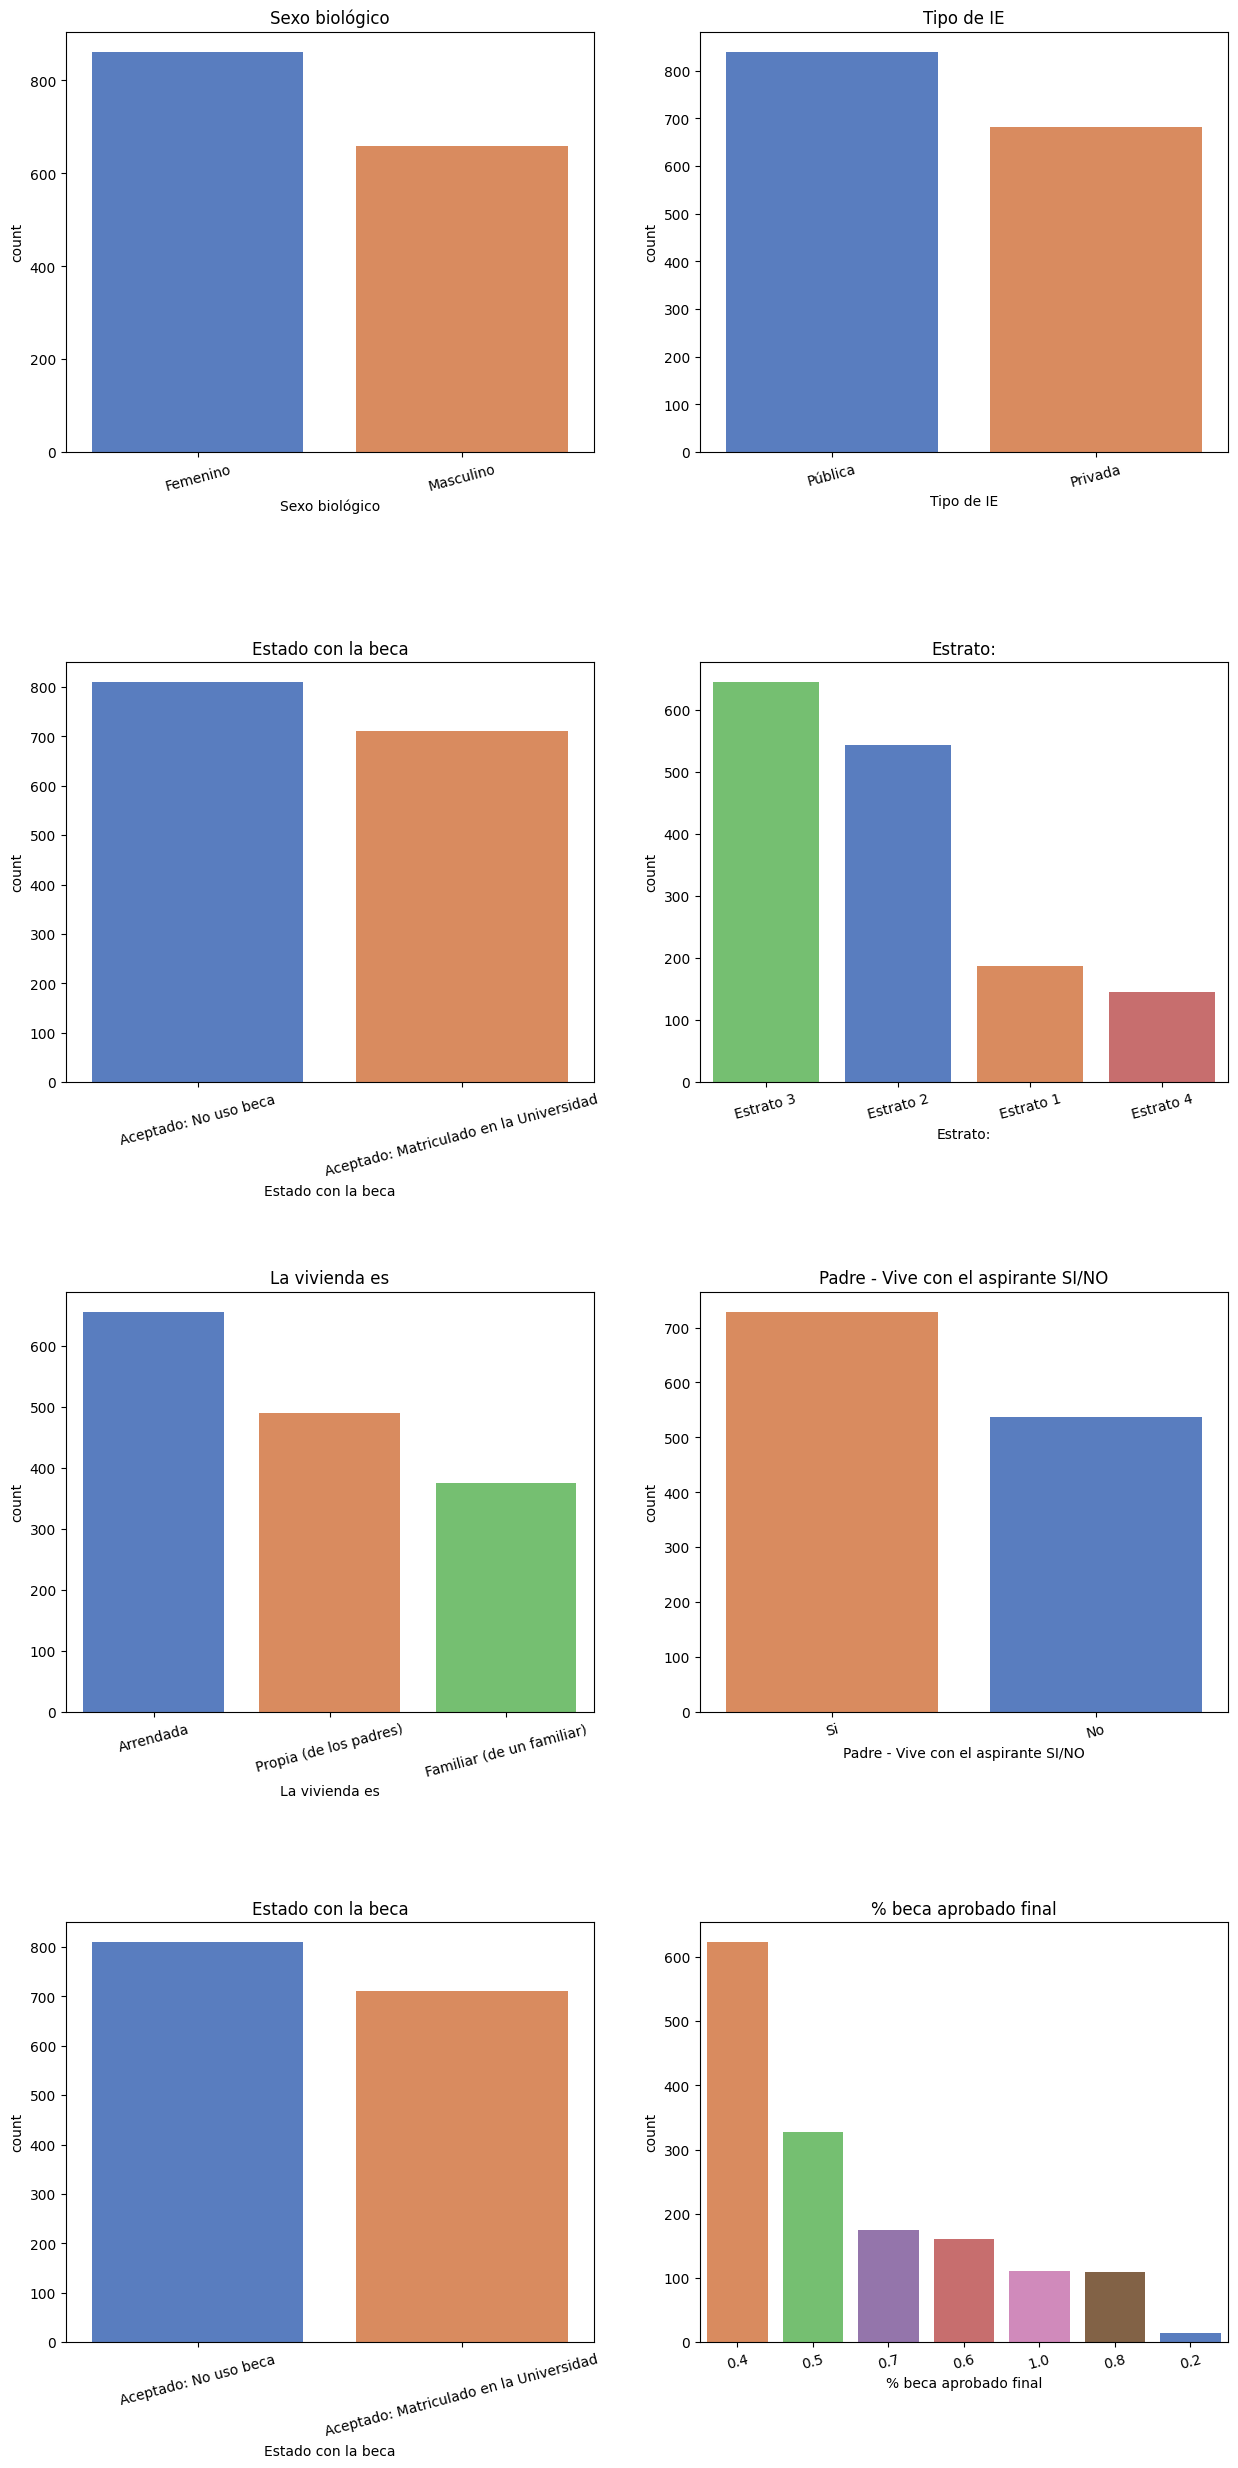

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras

column_cat = [ 'Sexo biológico', #'Pregrado al que aspiras',
              'Tipo de IE', #'Estudios de Educación Superior',
              'Estado con la beca',  'Estrato:', 'La vivienda es',
              'Padre - Vive con el aspirante SI/NO',
              #'Padre - Vive (S/N)', 'Madre - Vive con el aspirante SI/NO', 'Madre - Vive (S/N)',
              'Estado con la beca', '% beca aprobado final'#,  'Estado Otro Estudio(En curso, Finalizado)'
              ]


palette = sns.color_palette("muted")
num_graficos = len(column_cat)

# 2 columnas y calcular el número de filas necesario
ncols = 2
nrows = math.ceil(num_graficos / ncols)
# Crear subplots con 2 columnas y el número necesario de filas
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes para facilitar la iteración
ax = ax.flatten()
# Crear los gráficos de barras
for i, col in enumerate(column_cat):
    sns.countplot(x=col, data=df_Aceptados, ax=ax[i], palette='muted', hue=col, legend=False, order=df_Aceptados[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=15)

# Eliminar ejes vacíos si hay menos gráficos que espacios en la cuadrícula
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.show()


In [ ]:
df_Aceptados.describe()

,Edad,Año graduación,Puntaje Saber 11,Con cuántas personas vive,Padre - Ingresos,Madre - Ingresos,Total ingresos padres,% beca aprobado final,Ingreso_Familiares
count,1521.000000,1521.000000,1521.000000,1521.000000,1.425000e+03,1.506000e+03,1.521000e+03,1521.000000,1.521000e+03
mean,18.248632,2021.952663,337.595085,2.837607,1.994177e+06,1.948779e+06,3.797871e+06,0.547995,7.681393e+05
std,2.016629,1.800327,26.621514,1.347241,2.421787e+06,6.522878e+06,6.865637e+06,0.181797,1.800983e+06
min,15.000000,2001.000000,60.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.200000,0.000000e+00
25%,17.000000,2022.000000,317.000000,2.000000,0.000000e+00,0.000000e+00,1.600000e+06,0.400000,0.000000e+00
50%,18.000000,2023.000000,334.000000,3.000000,1.433600e+06,1.300000e+06,2.860750e+06,0.500000,0.000000e+00
75%,18.901370,2023.000000,353.000000,4.000000,3.000000e+06,2.600000e+06,4.788755e+06,0.700000,1.060000e+06
max,37.046575,2023.000000,441.000000,10.000000,4.003500e+07,2.420000e+08,2.420000e+08,1.000000,2.900000e+07


In [ ]:
# Calcula el número de valores nulos por columna
valores_nulos = df_Aceptados.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos = (valores_nulos / len(df_Aceptados)) * 100

# Crea un DataFrame con la cantidad y el porcentaje de nulos
tabla_nulos = pd.DataFrame({
    'Cantidad de Nulos': valores_nulos,
    'Porcentaje de Nulos': porcentaje_nulos
})

# Ordenar la tabla por porcentaje de nulos de manera descendente
tabla_nulos = tabla_nulos.sort_values(by='Porcentaje de Nulos', ascending=False)

# Seleccionar solo las 10 columnas con más nulos
top_nulos = tabla_nulos.head(17)

# Muestra la tabla resultante
print(top_nulos)

                                     Cantidad de Nulos  Porcentaje de Nulos
Padre - Vive con el aspirante SI/NO                255            16.765286
Padre - Ingresos                                    96             6.311637
Madre - Ingresos                                    15             0.986193
Barrio                                               1             0.065746
Edad                                                 0             0.000000
Sexo biológico                                       0             0.000000
% beca aprobado final                                0             0.000000
Estado con la beca                                   0             0.000000
Total ingresos padres                                0             0.000000
La vivienda es                                       0             0.000000
Estrato:                                             0             0.000000
Ciudad de Residencia                                 0             0.000000
Departamento

**Identificación de Outliers en variables númericas**
Las columnas que identificamos outliers les vamos a reemplazar el valor  por la mediana usando el método IQR

In [ ]:
# Definir una función para detectar outliers usando el método IQR
def detectar_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Reemplazar outliers por la mediana usando el método IQR
def reemplazar_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

In [ ]:
df_Aceptados['Año graduación'].unique()

array([2022., 2020., 2019., 2021., 2018., 2008., 2017., 2012., 2015.,
       2016., 2013., 2023., 2011., 2014., 2001.])

Aplicamos factor 3 e identificamos un valor muy anormal que no debería estar debido que los estudiantes deben tener mínimo 300  punto, a todos les aplicamos la media

In [ ]:
df_Aceptados['Puntaje Saber 11'].unique()

array([323.   , 350.   , 336.   , 337.   , 360.   , 305.   , 328.   ,
       340.   , 342.   , 365.   , 344.   , 358.   , 362.   , 348.   ,
       335.   , 314.   , 332.   , 309.   , 322.   , 341.   , 319.   ,
       355.   , 325.   , 320.   , 333.   , 381.   , 311.   , 313.   ,
       372.   , 316.   , 300.   , 310.   , 315.   , 352.   , 371.   ,
       324.   , 308.   , 395.   , 326.   , 327.   , 359.   , 303.   ,
       364.   , 345.   , 329.   , 357.   , 363.   , 301.   , 356.   ,
       317.   , 331.   , 330.   , 351.   , 307.   , 380.   , 368.   ,
       347.   , 366.   , 304.   , 318.   , 411.   , 339.   , 302.   ,
       433.   , 312.   , 343.   , 377.   , 353.   , 346.   , 338.   ,
       386.   , 378.   , 349.   , 369.   , 354.   , 392.   , 419.   ,
       306.   , 370.   , 374.   , 334.   , 390.   , 321.   , 375.   ,
       318.125, 373.   , 367.   , 403.   , 388.   , 420.   , 421.   ,
       427.   , 400.   , 387.   , 408.   , 407.   , 361.   , 398.   ,
       379.   , 389.

In [ ]:
Q1 = df_Aceptados['Puntaje Saber 11'].quantile(0.25)
Q3 = df_Aceptados['Puntaje Saber 11'].quantile(0.75)
IQR = Q3 - Q1

outliers_Saber = detectar_outliers_iqr(df_Aceptados, 'Puntaje Saber 11', factor=3)
outliers_Saber['Puntaje Saber 11']
outliers_Saber = reemplazar_outliers(df_Aceptados, 'Puntaje Saber 11', factor=3)


<ipython-input-105-1ca51ebfd17c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])


Para las personas con las que vive el Q1 = 2 y Q3 =4 , identificamos algunos estudiantes que viven con mas de 8 personas , los reemplazamos con la media

In [ ]:
Q1 = df_Aceptados['Con cuántas personas vive'].quantile(0.25)
Q3 = df_Aceptados['Con cuántas personas vive'].quantile(0.75)
IQR = Q3 - Q1

outliers_personas = detectar_outliers_iqr(df_Aceptados, 'Con cuántas personas vive', factor=1.5)
outliers_personas['Con cuántas personas vive']


,Con cuántas personas vive
48,8.0
441,8.0
591,9.0
1278,9.0
1287,8.0
1966,9.0
2709,10.0
2910,8.0
3501,9.0
3602,8.0


Identificamos un aspirante que tenía ingresos exagerados, casi 10 veces mas que el promedio, decidimos eliminar los outliers con la media

In [ ]:
Q1 = df_Aceptados['Total ingresos padres'].quantile(0.25)
Q3 = df_Aceptados['Total ingresos padres'].quantile(0.75)
IQR = Q3 - Q1

outliers_personas = detectar_outliers_iqr(df_Aceptados, 'Total ingresos padres', factor=8)
outliers_personas['Total ingresos padres']
outliers_personas = reemplazar_outliers(df_Aceptados, 'Total ingresos padres', factor=8)

<ipython-input-105-1ca51ebfd17c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])


In [ ]:
Q1 = df_Aceptados['Ingreso_Familiares'].quantile(0.25)
Q3 = df_Aceptados['Ingreso_Familiares'].quantile(0.75)
IQR = Q3 - Q1

outliers_personas = detectar_outliers_iqr(df_Aceptados, 'Ingreso_Familiares', factor=10)
outliers_personas['Ingreso_Familiares']


,Ingreso_Familiares
280,12000000.0
854,13000000.0
3011,15000000.0
3133,29000000.0


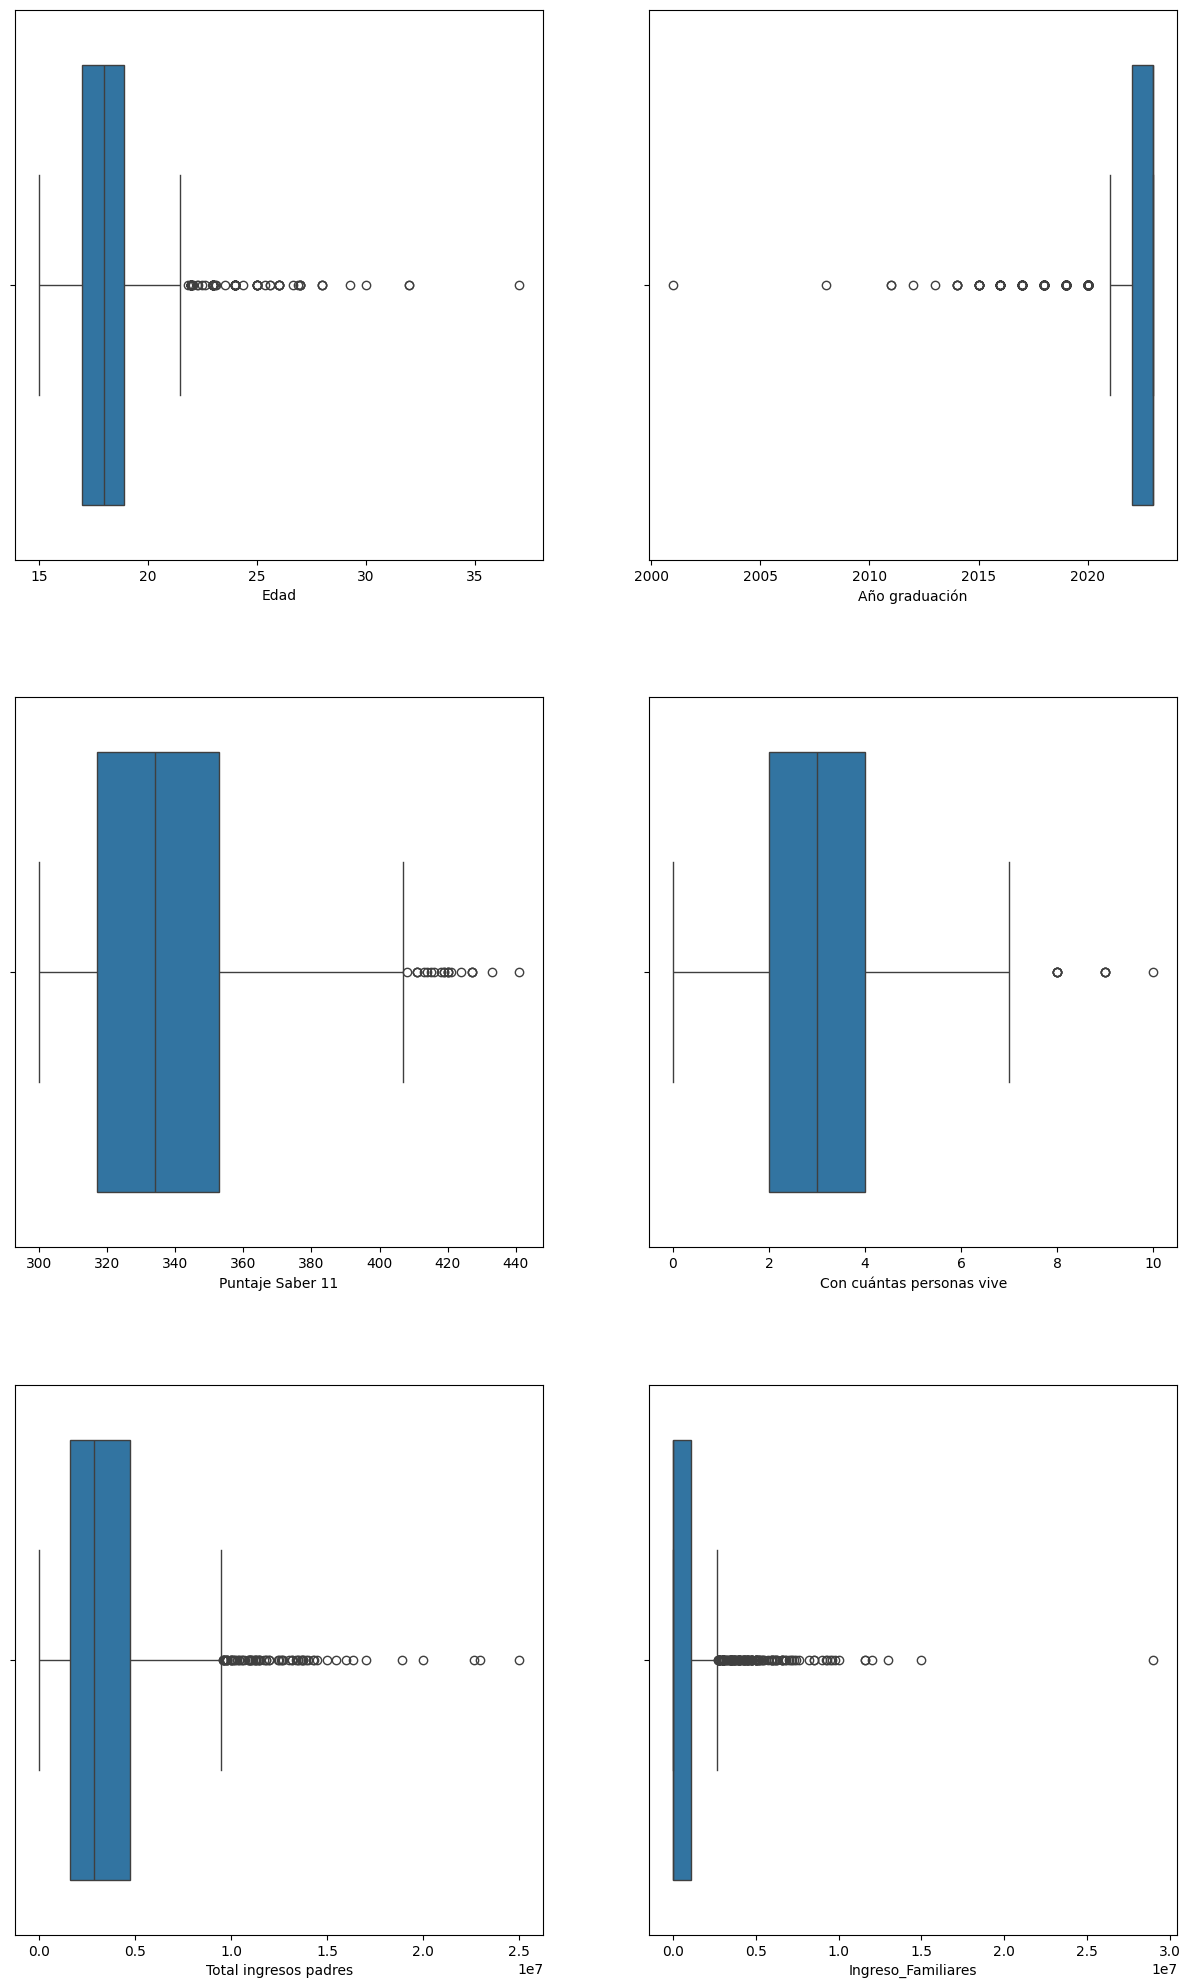

In [ ]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,25))
fig.subplots_adjust(hspace=.25)
# palette="muted"
# Visualizar los outliers
sns.boxplot(x=df_Aceptados['Edad'], ax=ax[0, 0] )
sns.boxplot(x=df_Aceptados['Año graduación'], ax=ax[0, 1] )
sns.boxplot(x=df_Aceptados['Puntaje Saber 11'], ax=ax[1, 0] )
sns.boxplot(x=df_Aceptados['Con cuántas personas vive'], ax=ax[1, 1])
sns.boxplot(x=df_Aceptados['Total ingresos padres'], ax=ax[2, 0])
sns.boxplot(x=df_Aceptados['Ingreso_Familiares'], ax=ax[2, 1] )

plt.show()

In [ ]:
column_num= ['Edad', 'Puntaje Saber 11', 'Padre - Ingresos', 'Madre - Ingresos', 'Total ingresos padres',
             'Familiar 1 - Edad', 'Madre - Edad', 'Padre - Edad',
             'Padre - Ingresos', 'Madre - Ingresos', 'Total ingresos padres', 'Familiar 1 - Ingresos']


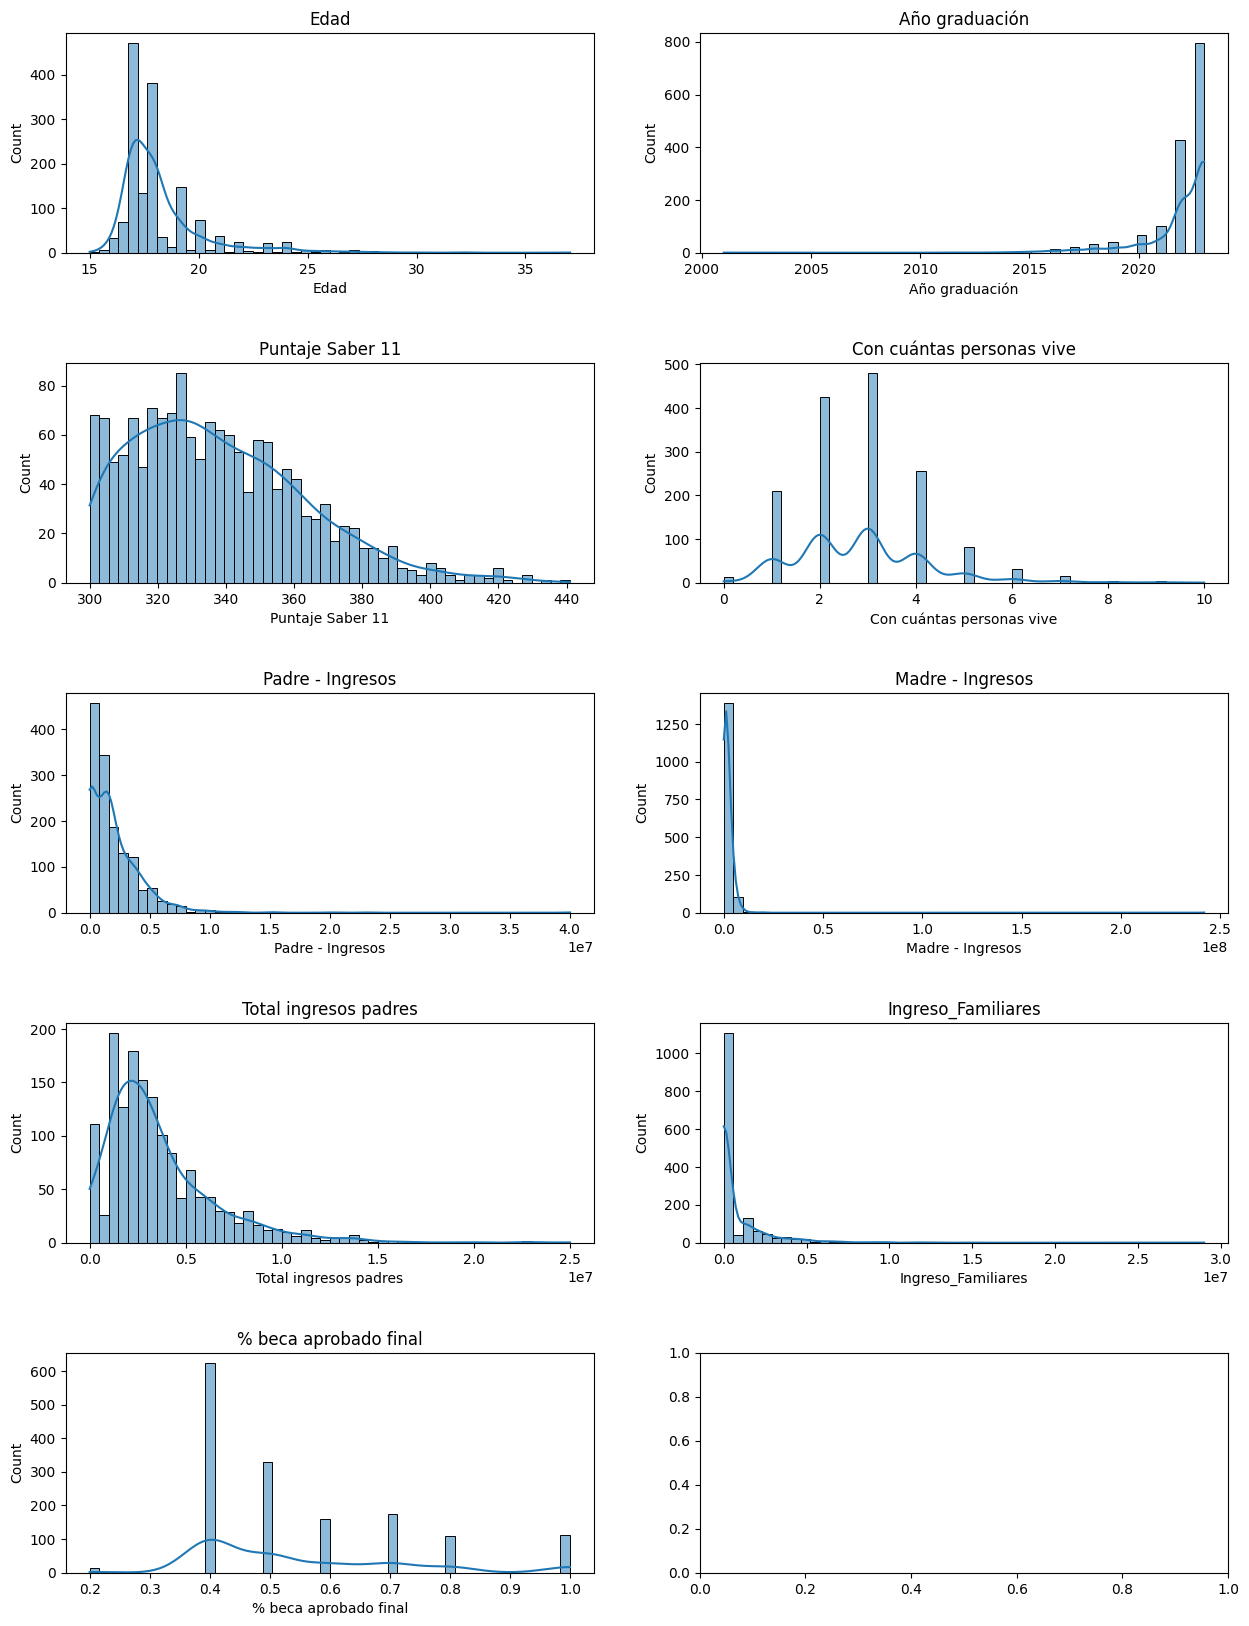

In [ ]:
# Dibujar histogramas
col_num = ['Edad', 'Año graduación', 'Puntaje Saber 11',
           'Con cuántas personas vive',
           #'Padre - Edad',
           'Padre - Ingresos',
           #'Madre - Edad',
           'Madre - Ingresos',
           'Total ingresos padres', 'Ingreso_Familiares',
           #'Familiar 1 - Edad',
           '% beca aprobado final'
           ]


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20)) # Change ax to axes
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    nbins = 50
    row = i // 2  # Calculate the row index
    col_index = i % 2  # Calculate the column index
    sns.histplot(x=col, data=df_Aceptados, ax=axes[row, col_index], bins=nbins, kde = True) # Access the axes using row and col_index
    axes[row, col_index].set_title(col) # Access the axes using row and col_index


##4.2 Análisis univariado

La idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('edad', 'Padre - Edad', 'sexo',  etc.) y la variable a predecir ('y').

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [ ]:
# Comencemos representando la variable a predecir  ('Estado con la beca')de forma binaria:
# 'Inscrito en la Universidad' = 1, 'Aceptado No uso beca' = 0
diccionario = {'Aceptado: Matriculado en la Universidad':1, 'Aceptado: No uso beca':0}
binario = df_Aceptados['Estado con la beca'].map(diccionario)
df_Aceptados['y_bin'] = binario

# De esta forma resulta fácil calcular los promedio de la columna 'y_bin'


<ipython-input-116-81aaa9a2f309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['y_bin'] = binario


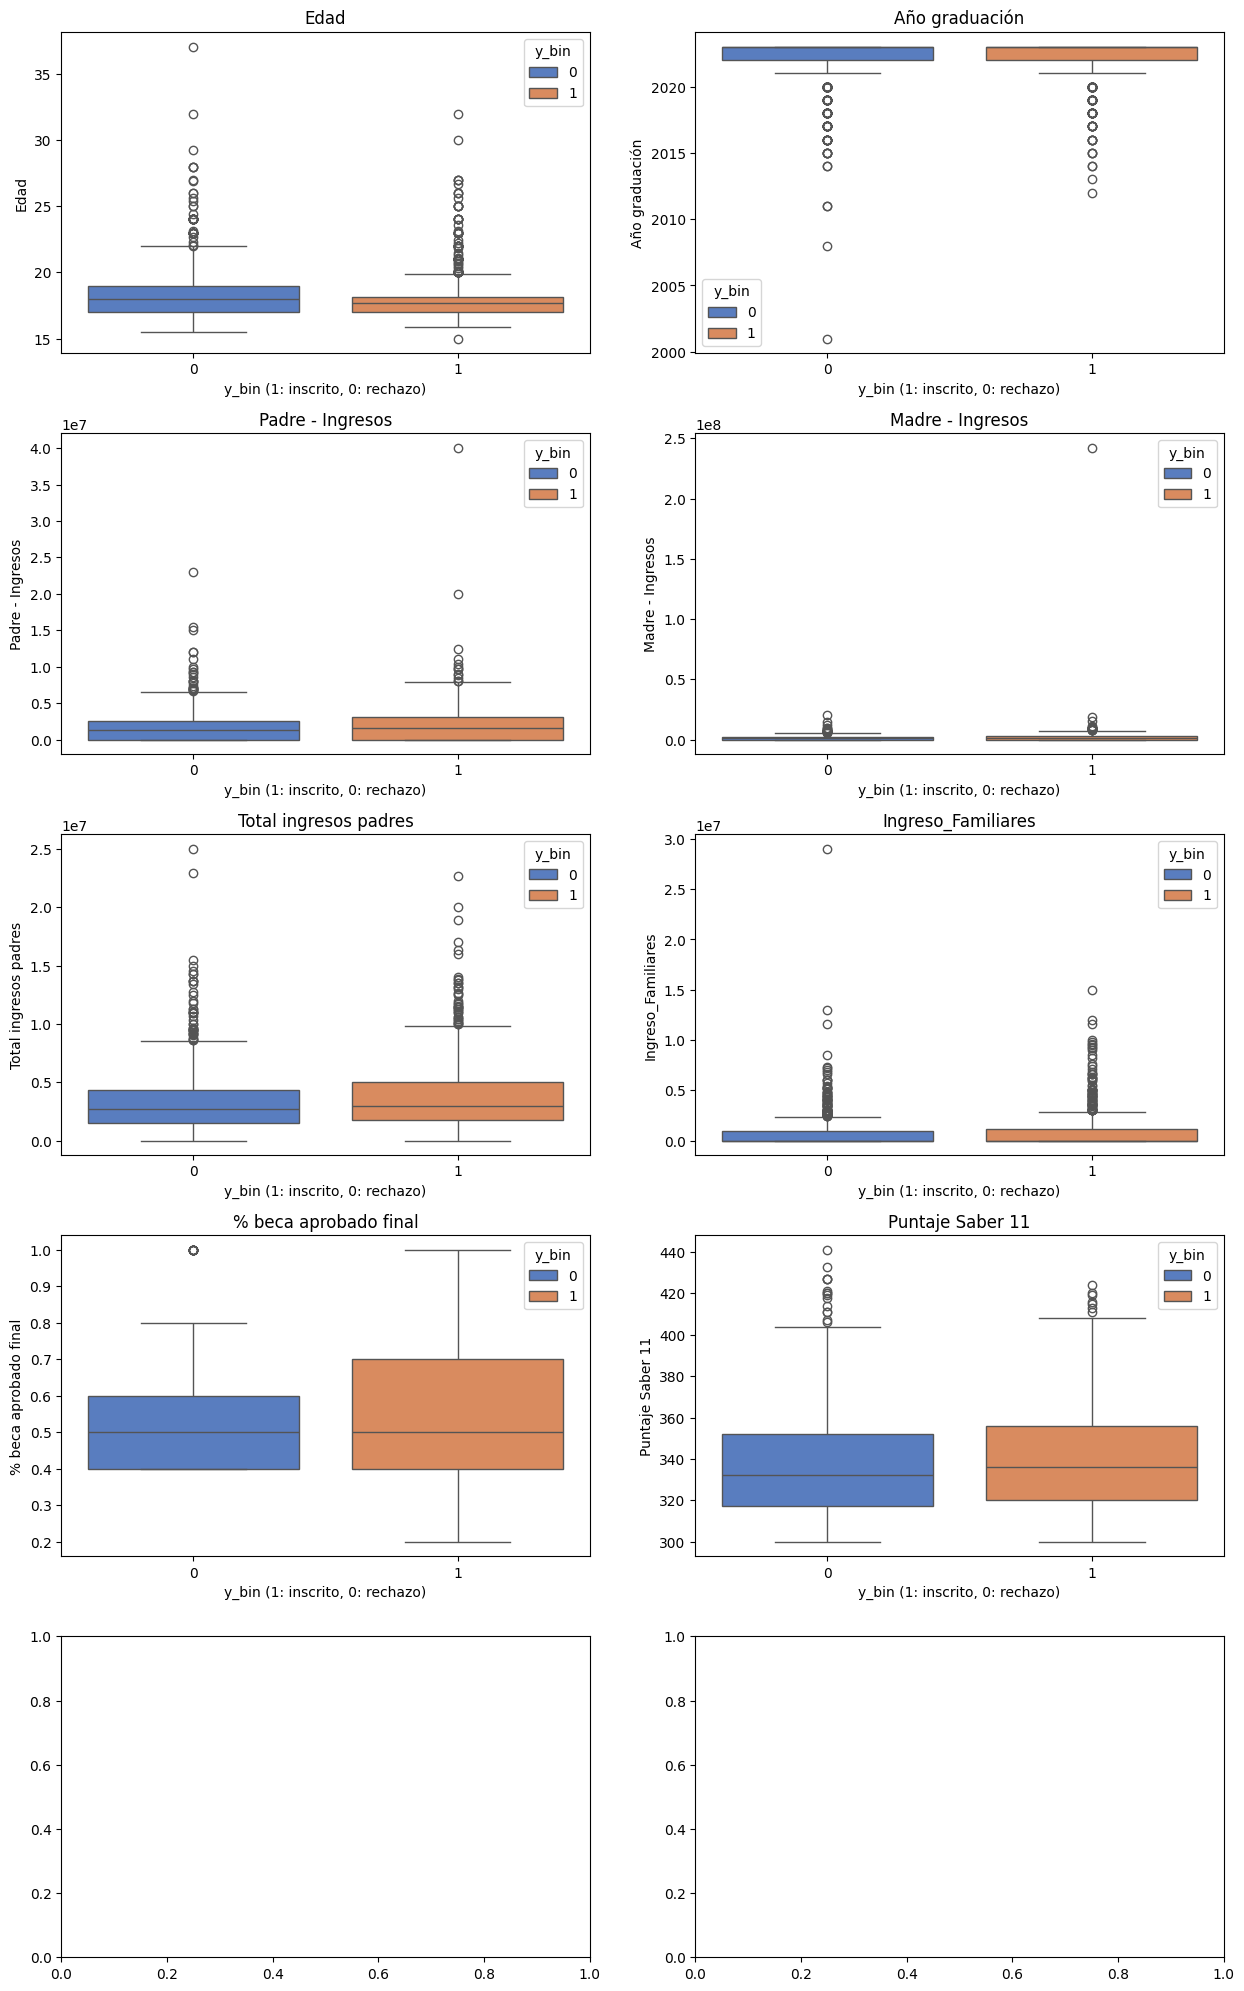

In [ ]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
fig.subplots_adjust(hspace=.25)
#palette = sns.color_palette("muted")


# Dibujar histogramas
col_num = ['Edad', 'Año graduación',
           #'Padre - Edad',
            'Padre - Ingresos',
          #'Madre - Edad'
           'Madre - Ingresos',
           'Total ingresos padres',  'Ingreso_Familiares',
           #'Familiar 1 - Edad',
           '% beca aprobado final', 'Puntaje Saber 11'
           ]

for i, col in enumerate(col_num):
  row = i // 2  # Calculate the row index
  col_index = i % 2  # Calculate the column index
  bplt = sns.boxplot(x="y_bin", y=col, data=df_Aceptados, ax=ax[row, col_index] , palette="muted", hue='y_bin')

  ax[row, col_index].set_xlabel('y_bin (1: inscrito, 0: rechazo)')
  ax[row, col_index].set_title(col)


Podemos observar que en los primeros analisis , para las Edades y de los padres vemos que hay edades que no tienen diferncia significativa.
Igual para las columnas de ingresos

In [ ]:
# Función para graficar tasas de conversión

def graficar_tasa_beca(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir
    #palette = sns.color_palette("muted")

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = df_Aceptados.groupby(x)[y].mean().mul(100).rename('Acepta_Beca').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='Acepta_Beca', data=grupo, palette="muted", hue=var_predictora)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='Acepta_Beca', data=grupo, order=order, palette="muted", hue=var_predictora)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='Acepta_Beca', data=grupo)
        plt.grid()

<ipython-input-119-c5fef13ce784>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.loc[:,'grupos_edad'] = "<17"


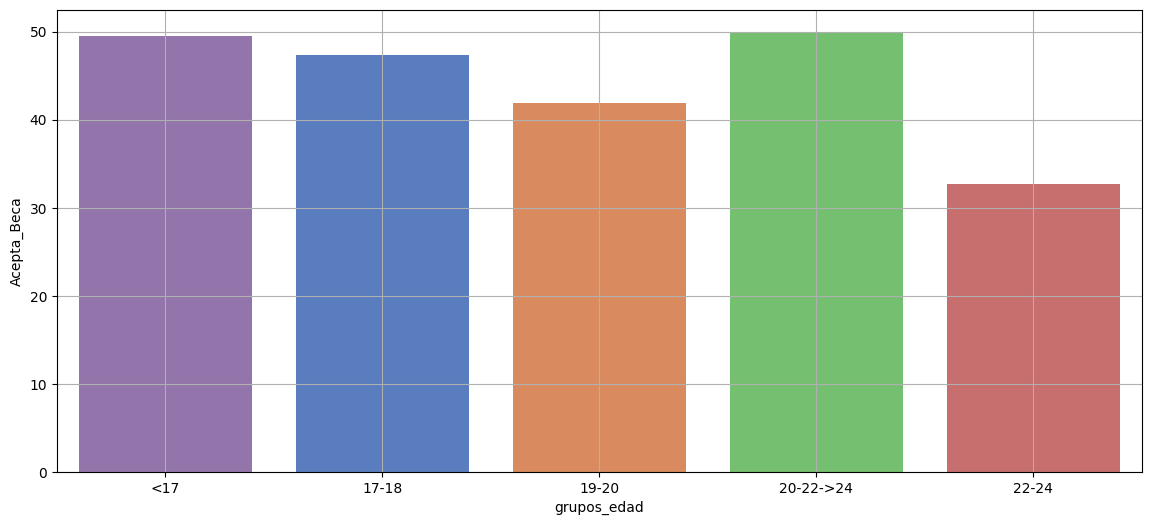

In [ ]:
# Creemos subbrupos de edades y calculemos las tasas de conversión en cada caso

# Nueva columna en el dataset: "grupos_edad"
df_Aceptados.loc[:,'grupos_edad'] = "<17"
df_Aceptados.loc[(df_Aceptados['Edad']>17)&(df_Aceptados['Edad']<=18), 'grupos_edad']  = "17-18"
df_Aceptados.loc[(df_Aceptados['Edad']>18)&(df_Aceptados['Edad']<=20), 'grupos_edad']  = "19-20"
df_Aceptados.loc[(df_Aceptados['Edad']>20)&(df_Aceptados['Edad']<=22)|(df_Aceptados['Edad']>24), 'grupos_edad']  = "20-22->24"
df_Aceptados.loc[(df_Aceptados['Edad']>22)&(df_Aceptados['Edad']<=24), 'grupos_edad']  = "22-24"


orden = ['<17', '17-18', '19-20',  "20-22->24", '22-24' ]
# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasa_beca('grupos_edad','y_bin',type='bar', order=orden)

Generamos subgrupos para ver en que rangos de edad tenemos mejores ingresos a la universidad

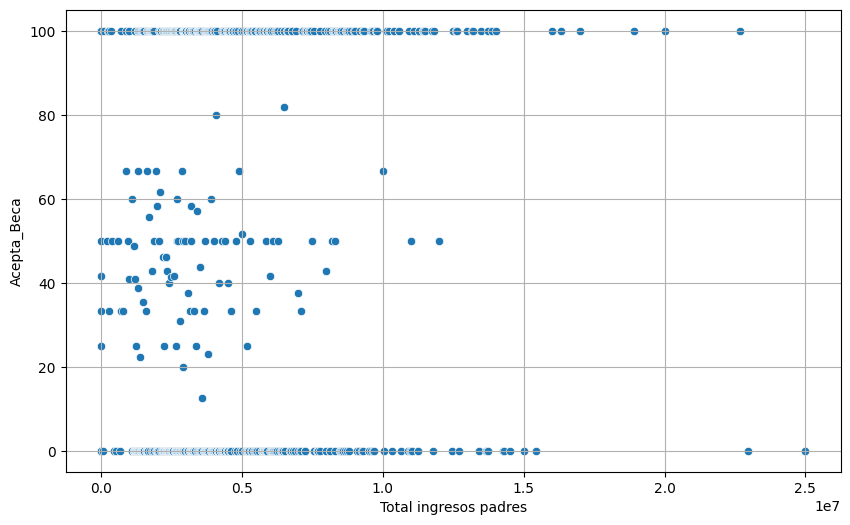

In [ ]:
# Realicemos el mismo análisis pero para los Ingresos
graficar_tasa_beca('Total ingresos padres','y_bin',type='scatter')

<ipython-input-121-1c7917573299>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.loc[:,'grupos_ingresos'] = "<1M"


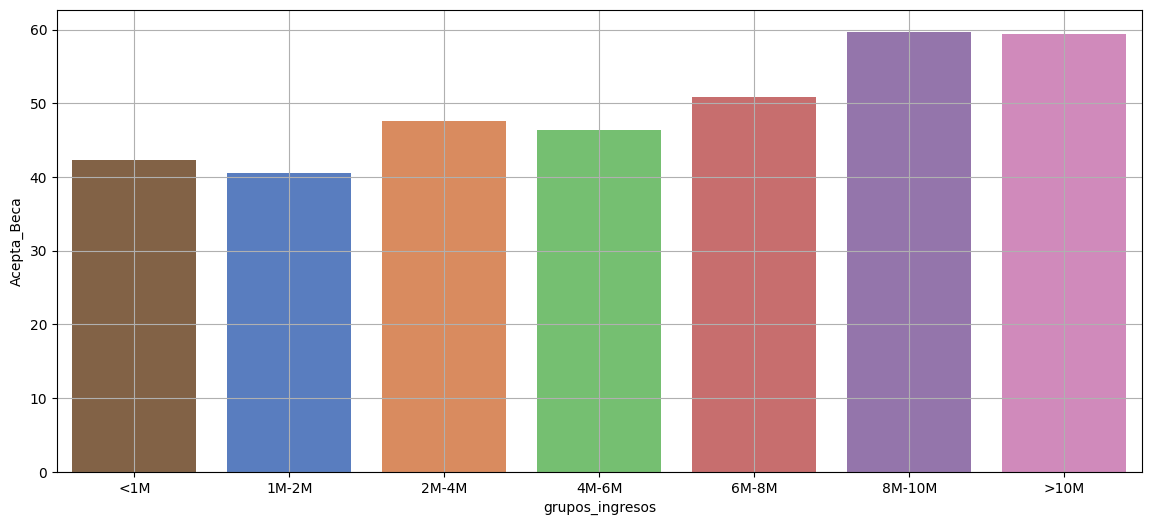

In [ ]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos

# Nueva columna en el dataset: "grupos_balance"
df_Aceptados.loc[:,'grupos_ingresos'] = "<1M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=1000000) & (df_Aceptados['Total ingresos padres']<2000000),'grupos_ingresos'] = "1M-2M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=2000000) & (df_Aceptados['Total ingresos padres']<4000000),'grupos_ingresos'] = "2M-4M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=4000000) & (df_Aceptados['Total ingresos padres']<6000000),'grupos_ingresos'] = "4M-6M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=6000000) & (df_Aceptados['Total ingresos padres']<8000000),'grupos_ingresos'] = "6M-8M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=8000000) & (df_Aceptados['Total ingresos padres']<10000000),'grupos_ingresos'] = "8M-10M"
df_Aceptados.loc[df_Aceptados['Total ingresos padres']>=10000000,'grupos_ingresos'] = ">10M"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<1M', '1M-2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '>10M']
graficar_tasa_beca('grupos_ingresos','y_bin',type='bar', order=orden)

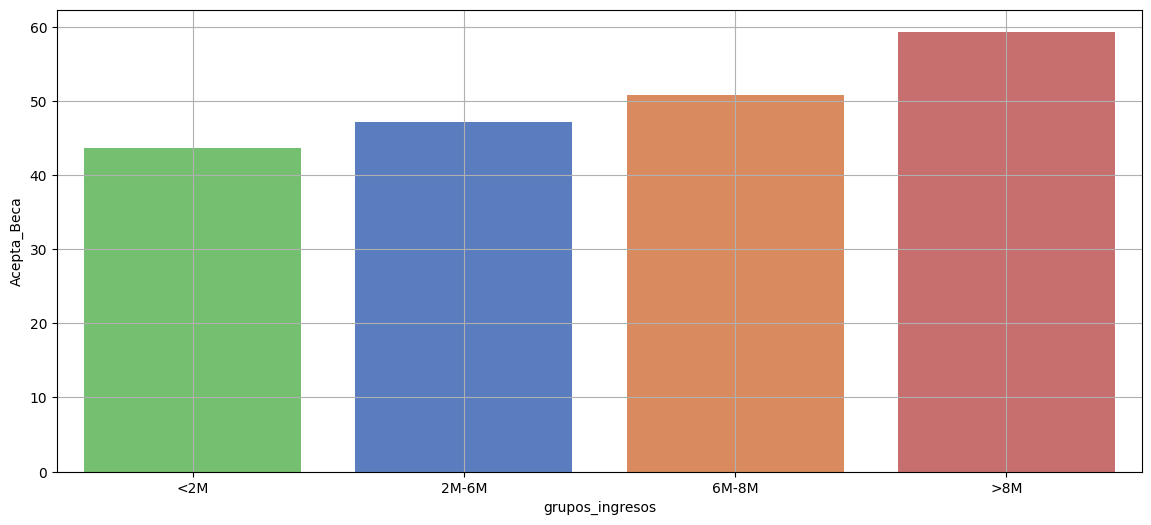

In [ ]:
# Unificamos los rangos que tienen comportamientos similares como son menos de 2M , de 2M a 6M y los mayores a 8m
#para simplificar las variables
# Nueva columna en el dataset: "grupos_ingresos"
df_Aceptados.loc[:,'grupos_ingresos'] = "<2M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=2000000) & (df_Aceptados['Total ingresos padres']<6000000),'grupos_ingresos'] = "2M-6M"
df_Aceptados.loc[(df_Aceptados['Total ingresos padres']>=6000000) & (df_Aceptados['Total ingresos padres']<8000000),'grupos_ingresos'] = "6M-8M"
df_Aceptados.loc[df_Aceptados['Total ingresos padres']>=10000000,'grupos_ingresos'] = ">8M"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<2M', '2M-6M', '6M-8M','>8M']
graficar_tasa_beca('grupos_ingresos','y_bin',type='bar', order=orden)

Vemos que las tasas de aceptacion de las becas son mayores cuando los padres tienen ingresos mayores a 8millones , incluso mas de 6 millones hay una aceptacion de poco mas del 50% , mientras que en menos de 6millones la desercion de beca es menor al 50%

<ipython-input-123-257c623be867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.loc[:,'grupos_ingresos_familiar'] = "<4M"


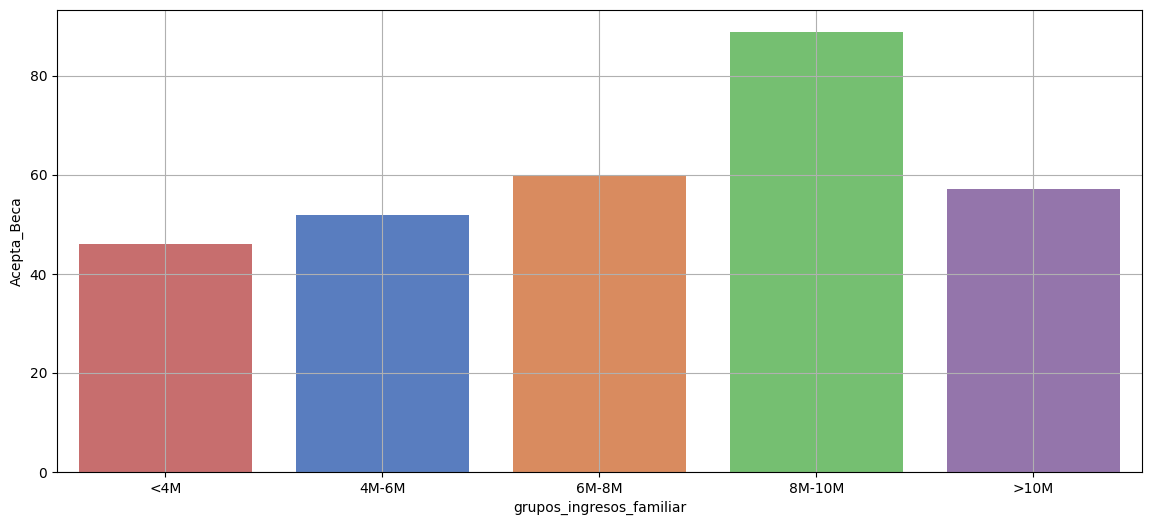

In [ ]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos
# Nueva columna en el dataset: "grupos_ingresos_familiar"
df_Aceptados.loc[:,'grupos_ingresos_familiar'] = "<4M"
df_Aceptados.loc[(df_Aceptados['Ingreso_Familiares']>=4000000) & (df_Aceptados['Ingreso_Familiares']<6000000),'grupos_ingresos_familiar'] = "4M-6M"
df_Aceptados.loc[(df_Aceptados['Ingreso_Familiares']>=6000000) & (df_Aceptados['Ingreso_Familiares']<8000000),'grupos_ingresos_familiar'] = "6M-8M"
df_Aceptados.loc[(df_Aceptados['Ingreso_Familiares']>=8000000) & (df_Aceptados['Ingreso_Familiares']<10000000),'grupos_ingresos_familiar'] = "8M-10M"
df_Aceptados.loc[df_Aceptados['Ingreso_Familiares']>=10000000,'grupos_ingresos_familiar'] = ">10M"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<4M', '4M-6M', '6M-8M', '8M-10M', '>10M']
graficar_tasa_beca('grupos_ingresos_familiar','y_bin',type='bar', order=orden)

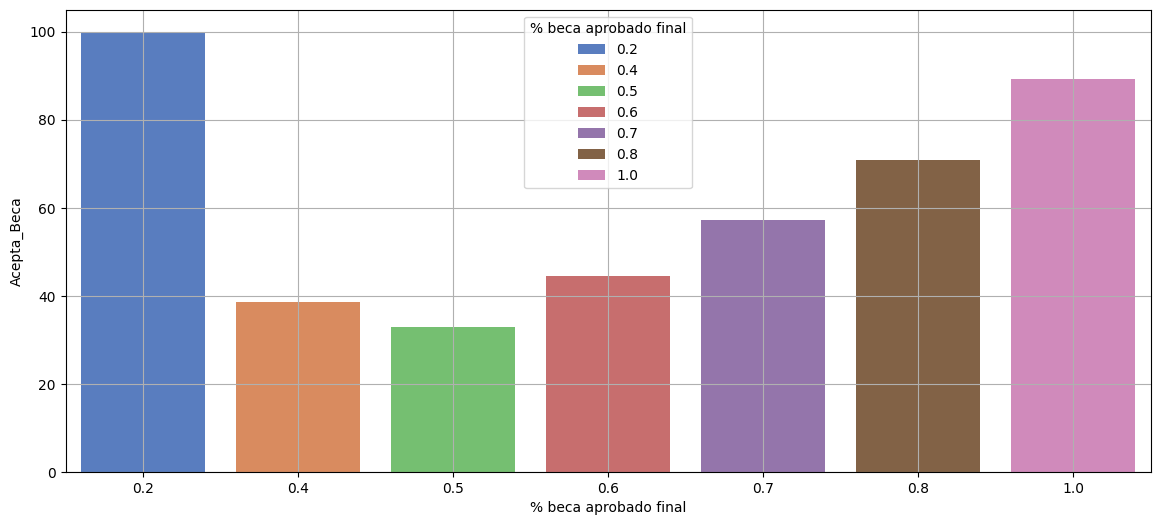

In [ ]:
graficar_tasa_beca('% beca aprobado final','y_bin',type='bar')

Hay algo muy claro y es que los estudiantes entre mayor porcentaje de beca obtienen, mayor probabilidad de  inscribirse en la universidad. Sabemos que los pocos estudiantes que tuvieron un 20% fueron casos especiales. Menos del 70% mas del 50% de los estudiantes desisten de la tomar la beca

<ipython-input-125-6ee0626ba6a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.loc[:,'grupos_Puntaje'] = "<301"


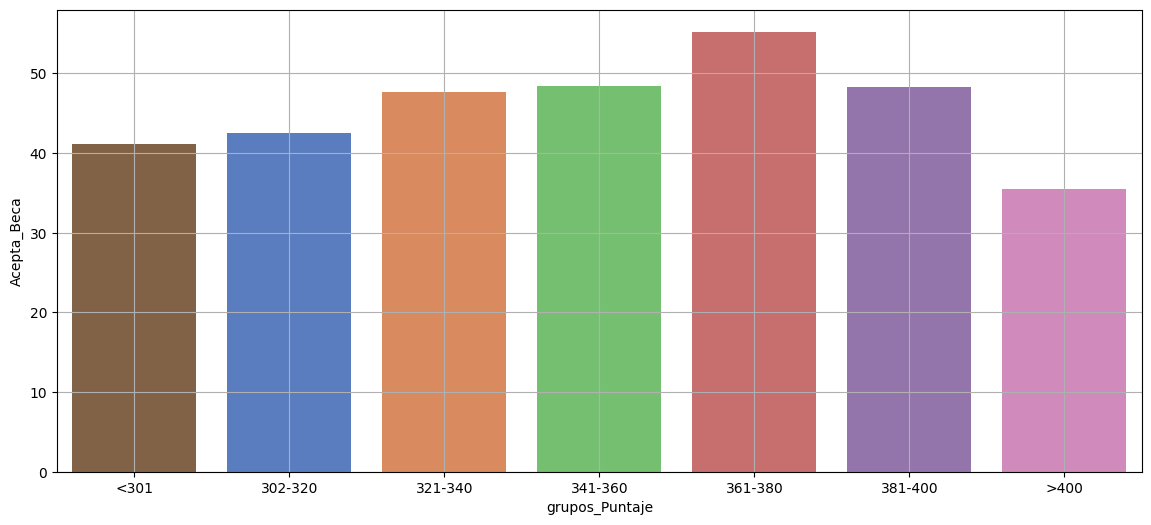

In [ ]:
df_Aceptados.loc[:,'grupos_Puntaje'] = "<301"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>301)&(df_Aceptados['Puntaje Saber 11']<=320), 'grupos_Puntaje']  = "302-320"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>321)&(df_Aceptados['Puntaje Saber 11']<=340), 'grupos_Puntaje']  = "321-340"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>341)&(df_Aceptados['Puntaje Saber 11']<=360), 'grupos_Puntaje']  = "341-360"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>361)&(df_Aceptados['Puntaje Saber 11']<=380), 'grupos_Puntaje']  = "361-380"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>381)&(df_Aceptados['Puntaje Saber 11']<=400), 'grupos_Puntaje']  = "381-400"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>400), 'grupos_Puntaje'] = ">400"

orden = ['<301', '302-320', '321-340', '341-360', '361-380', '381-400', '>400']
graficar_tasa_beca('grupos_Puntaje','y_bin',type='bar', order=orden)

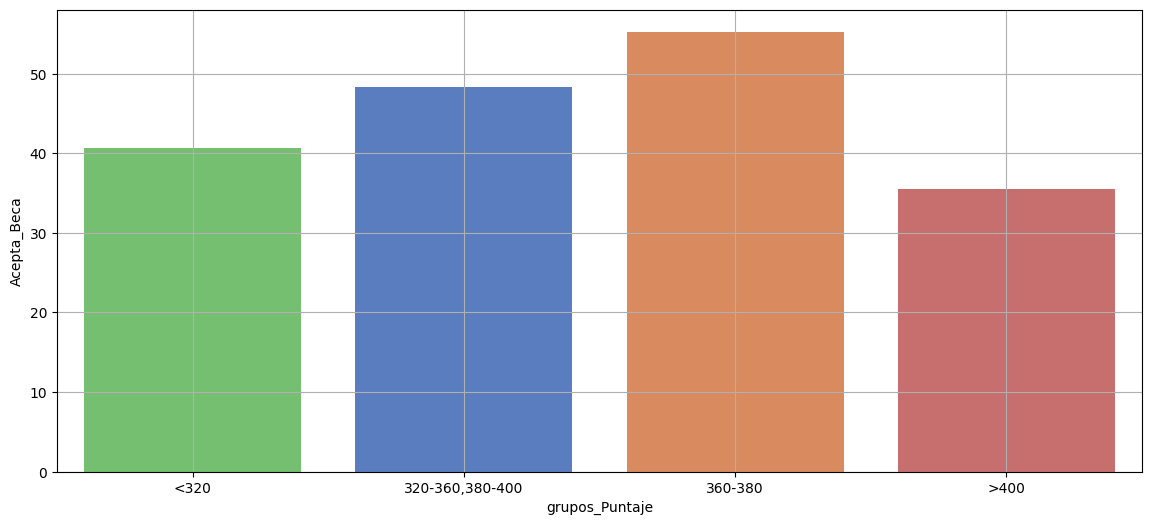

In [ ]:
# AGRUPAMOS comportamientos similares

df_Aceptados.loc[:,'grupos_Puntaje'] = "<320"
df_Aceptados.loc[((df_Aceptados['Puntaje Saber 11'] > 319) & (df_Aceptados['Puntaje Saber 11'] <= 360)) |
                 ((df_Aceptados['Puntaje Saber 11'] > 380) & (df_Aceptados['Puntaje Saber 11'] <= 400)),
                 'grupos_Puntaje'] = "320-360,380-400"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>360)&(df_Aceptados['Puntaje Saber 11']<=380), 'grupos_Puntaje']  = "360-380"
#df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>380)&(df_Aceptados['Puntaje Saber 11']<=400), 'grupos_Puntaje']  = "380-400"
df_Aceptados.loc[(df_Aceptados['Puntaje Saber 11']>400), 'grupos_Puntaje'] = ">400"
orden = ['<320', '320-360,380-400', '360-380', '>400']
graficar_tasa_beca('grupos_Puntaje','y_bin',type='bar', order=orden)

In [ ]:
df_Aceptados['Año graduación'].unique()

array([2022., 2020., 2019., 2021., 2018., 2008., 2017., 2012., 2015.,
       2016., 2013., 2023., 2011., 2014., 2001.])

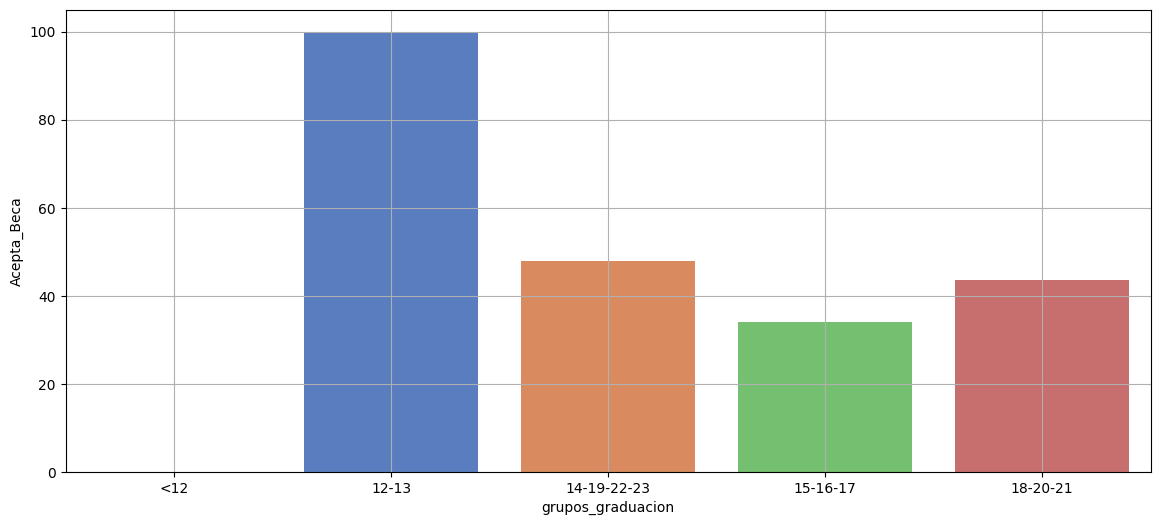

In [ ]:
df_Aceptados.loc[:,'grupos_graduacion'] = "<12"
#df_Aceptados.loc[(df_Aceptados['Año graduación']<2012), 'grupos_graduacion'] ="<12"
df_Aceptados.loc[(df_Aceptados['Año graduación']>2011)&(df_Aceptados['Año graduación']<=2013), 'grupos_graduacion']  = "12-13"
df_Aceptados.loc[(df_Aceptados['Año graduación']==2014)|(df_Aceptados['Año graduación']==2019)|(df_Aceptados['Año graduación']==2022)|(df_Aceptados['Año graduación']==2023), 'grupos_graduacion']  = "14-19-22-23"
df_Aceptados.loc[(df_Aceptados['Año graduación']>2014)&(df_Aceptados['Año graduación']<=2017), 'grupos_graduacion']  = "15-16-17"
df_Aceptados.loc[(df_Aceptados['Año graduación']==2018)|(df_Aceptados['Año graduación']==2020)|(df_Aceptados['Año graduación']==2021), 'grupos_graduacion']  = "18-20-21"



orden = ['<12', '12-13', '14-19-22-23', '15-16-17', '18-20-21']
graficar_tasa_beca('grupos_graduacion','y_bin',type='bar', order=orden)


#graficar_tasas_conversion('Año graduación','y_bin',type='bar' )

In [ ]:

df_Aceptados.drop(columns=['Padre - Ingresos'], inplace=True)
df_Aceptados.drop(columns=['Madre - Ingresos'], inplace=True)

df_Aceptados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 0 to 3827
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Edad                                 1521 non-null   float64
 1   Sexo biológico                       1521 non-null   object 
 2   Colegio                              1521 non-null   object 
 3   Tipo de IE                           1521 non-null   object 
 4   Año graduación                       1521 non-null   float64
 5   Municipio IE                         1521 non-null   object 
 6   Dpto IE                              1521 non-null   object 
 7   Física -  10°                        1521 non-null   object 
 8   Física -  11°                        1521 non-null   object 
 9   Química -  10°                       1521 non-null   object 
 10  Química -  11°                       1521 non-null   object 
 11  Matemáticas - Grado 10°            

<ipython-input-130-8236ed729d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.drop(columns=['Padre - Ingresos'], inplace=True)
<ipython-input-130-8236ed729d03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.drop(columns=['Madre - Ingresos'], inplace=True)


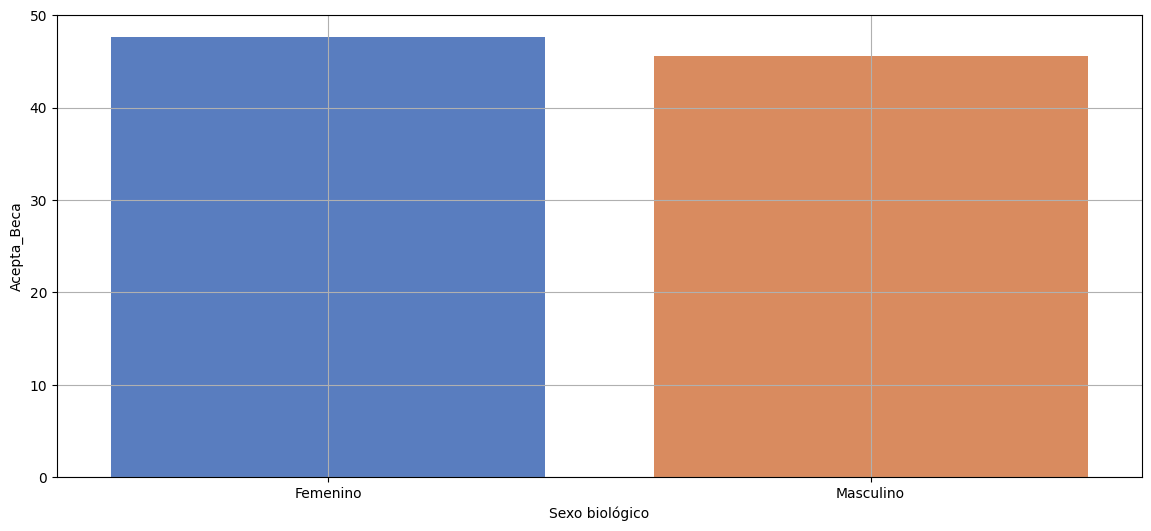

In [ ]:
graficar_tasa_beca('Sexo biológico','y_bin',type='bar')

- El colegio y Barrio tiene una distribución muy grande de valores , esta variable no nos aporta mucha informacion al modelo por eso la eliminamos
- El sexo entrega tasas de aceptación de la beca muy similares , la eliminamos ya que no aporta mucha informacion al modelo

In [ ]:
df_Aceptados.drop(columns=['Colegio'], inplace=True)
df_Aceptados.drop(columns=['Barrio'], inplace=True)


<ipython-input-132-609472010fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.drop(columns=['Colegio'], inplace=True)
<ipython-input-132-609472010fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados.drop(columns=['Barrio'], inplace=True)


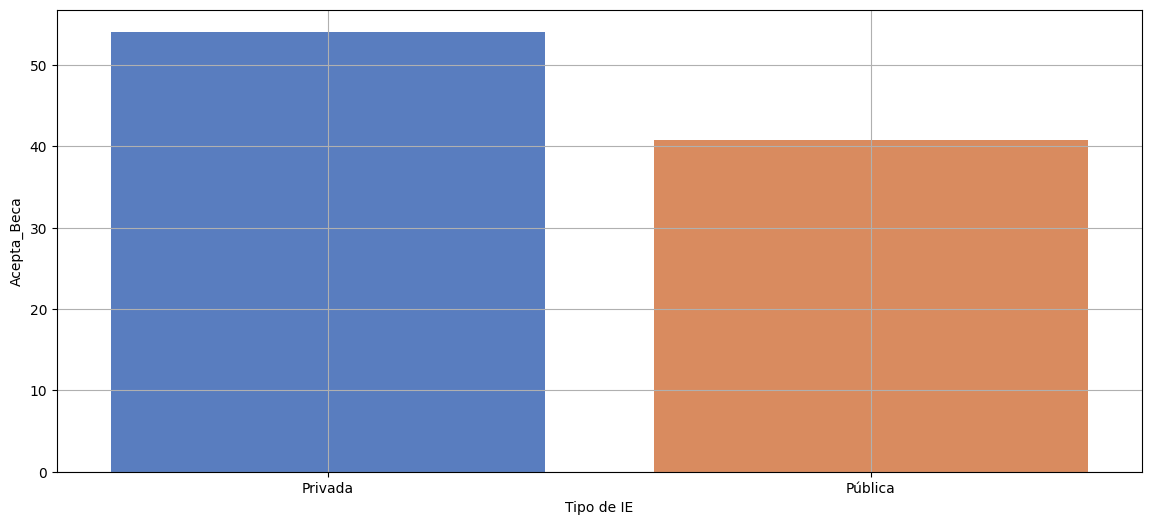

In [ ]:
graficar_tasa_beca('Tipo de IE','y_bin',type='bar')

In [ ]:
df_Aceptados['Dpto IE'] = df_Aceptados['Dpto IE'].str.strip().str.upper()
df_Aceptados['Dpto IE'].unique()

<ipython-input-134-4bd1320198a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['Dpto IE'] = df_Aceptados['Dpto IE'].str.strip().str.upper()


array(['CALDAS', 'ANTIOQUIA', 'ANTIOQUÍA', 'CORTES', 'SANTANDER',
       'NARIÑO', 'NORTE DE SANTANDER', 'BOYACÁ', 'PUTUMAYO', 'CÓRDOBA',
       'HUILA', 'ATLÁNTICO', 'ATLANTICO', 'CESAR', 'CORDOBA',
       'VALLE DEL CAUCA', 'QUINDÍO', 'BOGOTÁ', 'TOLIMA', 'BOGOTÁ D.C.',
       'ANTIOQUIA.', 'META', 'ARAUCA', 'CHOCÓ', 'BOLIVAR', 'LA GUAJIRA',
       'CUNDINAMARCA', 'MEDELLÍN', 'MAGDALENA', 'CHOCO', 'RISARALDA',
       'BOLÍVAR', 'ANRIOQUIA', 'AANTIOQUIA', 'DISTRITO CAPITAL', 'CAUCA',
       'QUINDIO', 'CASANARE', 'SUCRE', 'OTRO',
       'ARCHIPIELAGO DE SAN ANDRES', 'CAQUETA'], dtype=object)

In [ ]:

df_Aceptados['Dpto IE'] = df_Aceptados['Dpto IE'].replace({
    'ANTIOQUÍA': 'ANTIOQUIA', 'ANTIOQUIA.': 'ANTIOQUIA', 'AANTIOQUIA': 'ANTIOQUIA', 'MEDELLÍN':'ANTIOQUIA', 'ANRIOQUIA':'ANTIOQUIA','AANTIOQUIA':'ANTIOQUIA',
    'ATLÁNTICO': 'ATLANTICO','DISTRITO CAPITAL': 'BOGOTÁ D.C.','BOGOTÁ': 'BOGOTÁ D.C.' ,'CHOCÓ':'CHOCO',
    'CORTES':'OTRO','BOLÍVAR':'BOLIVAR', 'CÓRDOBA':'CORDOBA',  'QUINDÍO':'QUINDIO', 'BOLÍVAR': 'BOLIVAR'

})

<ipython-input-135-cd0c3f5189d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aceptados['Dpto IE'] = df_Aceptados['Dpto IE'].replace({


In [ ]:
# Crea una tabla agrupando por 'Dpto IE', calcula el porcentaje de aceptación y la cantidad de registros
tabla = df_Aceptados.groupby('Dpto IE').agg(
    Porcentaje_de_Aceptación=('y_bin', 'mean'),
    Cantidad_Registros=('y_bin', 'size')
).reset_index()

# Convierte el porcentaje de aceptación a porcentaje
tabla['Porcentaje_de_Aceptación'] = tabla['Porcentaje_de_Aceptación'] * 100

# Muestra la tabla ordenada por el porcentaje de aceptación en orden descendente
print(tabla.sort_values(by='Porcentaje_de_Aceptación', ascending=False))


                       Dpto IE  Porcentaje_de_Aceptación  Cantidad_Registros
2   ARCHIPIELAGO DE SAN ANDRES                 66.666667                   3
23                     QUINDIO                 60.000000                   5
25                   SANTANDER                 56.250000                  16
13                     CORDOBA                 53.658537                  41
16                  LA GUAJIRA                 50.000000                   8
3                    ATLANTICO                 50.000000                  28
6                       BOYACÁ                 50.000000                  12
7                       CALDAS                 50.000000                  12
0                    ANTIOQUIA                 48.590948                1171
26                       SUCRE                 44.444444                   9
11                       CESAR                 44.444444                  18
18                        META                 44.444444                   9

- Dpto IE: Esta puede ser una buena variable predictora , ya que hay departamentos como caqueta , Nariño , putumayo , huila , entre otros que tienen tasas de aceptación de la beca muy bajos

In [ ]:
# Crea un nuevo DataFrame llamado 'tabla' que contiene el porcentaje de aceptación por departamento
tabla = df_Aceptados.groupby('Dpto IE')['y_bin'].mean().mul(100).reset_index(name='Porcentaje de Aceptación')

# Define las condiciones para la categorización
conditions = [
    tabla['Porcentaje de Aceptación'] < 20,
    (tabla['Porcentaje de Aceptación'] >= 20) & (tabla['Porcentaje de Aceptación'] <= 30),
    (tabla['Porcentaje de Aceptación'] >= 30) & (tabla['Porcentaje de Aceptación'] <= 40),
    (tabla['Porcentaje de Aceptación'] >= 40) & (tabla['Porcentaje de Aceptación'] <= 50),
    (tabla['Porcentaje de Aceptación'] >= 50) & (tabla['Porcentaje de Aceptación'] <= 60),
    tabla['Porcentaje de Aceptación'] > 60
]

# Define las categorías correspondientes a las condiciones
categories = ['<20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '>60%']

# Crea una nueva columna 'Departamentos_IE' en 'tabla' basada en las condiciones
tabla['Departamentos_IE'] = np.select(conditions, categories)

# Combina df_Aceptados con tabla usando 'Dpto IE' como clave
df_Aceptados = df_Aceptados.merge(tabla[['Dpto IE', 'Departamentos_IE']], on='Dpto IE', how='left')

In [ ]:
df_Aceptados['Pregrado al que aspiras'] = df_Aceptados['Pregrado al que aspiras'].replace({
    'Ingeniería en Sistemas': 'Ingeniería de Sistemas'
})

In [ ]:
tabla_pregrado = df_Aceptados.groupby('Pregrado al que aspiras').agg(
    Porcentaje_de_Aceptación=('y_bin', 'mean'),
    Cantidad_Registros=('y_bin', 'size')
).reset_index()
# Convierte el porcentaje de aceptación a porcentaje
tabla_pregrado['Porcentaje_de_Aceptación'] = tabla_pregrado['Porcentaje_de_Aceptación'] * 100

tabla_pregrado['Aspirantes Aceptaron Beca'] =  (tabla_pregrado['Porcentaje_de_Aceptación'] * tabla_pregrado['Cantidad_Registros'] / 100).round().astype(int)

tabla_pregrado = tabla_pregrado.sort_values(by='Cantidad_Registros', ascending=False)

# Aplica estilos para resaltar la tabla
tabla_pregrado.style.format({"Porcentaje_de_Aceptación": "{:.2f}"}).background_gradient(cmap="YlGnBu")


,Pregrado al que aspiras,Porcentaje_de_Aceptación,Cantidad_Registros,Aspirantes Aceptaron Beca
21,Ingeniería de Sistemas,41.90,179,75
0,Administración de Negocios,60.16,123,74
5,Derecho,39.02,123,48
25,Negocios Internacionales,49.09,110,54
6,Diseño Interactivo,55.00,100,55
26,Psicología,36.96,92,34
3,Comunicación Social,47.30,74,35
12,Ingeniería Civil,41.18,68,28
9,Finanzas,54.55,66,36
1,Biología,41.38,58,24


In [ ]:
# Crea una tabla agrupando por 'Dpto IE' y calcula el porcentaje de aceptación
tabla_pregrado = df_Aceptados.groupby('Pregrado al que aspiras')['y_bin'].mean().mul(100).reset_index(name='Porcentaje de Aceptación')

from prettytable import PrettyTable

# Crear la tabla
tabla_ordenada = tabla_pregrado.sort_values(by='Porcentaje de Aceptación', ascending=False)
table = PrettyTable()
table.field_names = ["Pregrado al que aspiras", "Porcentaje de Aceptación"]

# Añadir filas a la tabla
for index, row in tabla_ordenada.iterrows():
    table.add_row([row['Pregrado al que aspiras'], f"{row['Porcentaje de Aceptación']:.2f}%"])

# Mostrar la tabla
print(table)

#graficar_tasa_beca('Pregrado al que aspiras','y_bin',type='bar')

+-------------------------------------+--------------------------+
|       Pregrado al que aspiras       | Porcentaje de Aceptación |
+-------------------------------------+--------------------------+
|   Ingeniería de Diseño de producto  |          77.78%          |
|               Mercadeo              |          64.29%          |
|        Ingeniería Matemática        |          61.29%          |
|      Administración de Negocios     |          60.16%          |
|                Música               |          60.00%          |
| Diseño Urbano y Gestión del Hábitat |          60.00%          |
|       Ingeniería de Producción      |          57.14%          |
|          Diseño Interactivo         |          55.00%          |
|               Finanzas              |          54.55%          |
|         Ingeniería Mecánica         |          51.79%          |
|    Ingeniería Diseño de Producto    |          51.52%          |
|       Negocios Internacionales      |          49.09%       

- 'Pregrado al que aspiras' : parece ser una buena variable predictora, vemos que "Ingeniería de Diseño de producto ", "Mercadeo", "Ingeniería Matemática " , entre otras tienen muy buena aceptacion , mientras que Ingeniería de Procesos y Literatura tienen una tasa muy baja de aceptacion

- Identificamos que los aspirantes que NUNCA han estudiado en educación superior tienen mayor tasa de aceptación de la beca.
- Por tipo de programa, no puede ser una variable predictora debido a los poca diferencia que hay en los resultados, aunque  hay una pequeña preferencia de aceptar la beca por los estudiantes que han realizado estudios TECNICOS.
- El Nombre del programa, no aporta mucha información por la gran variedad de programas que se estudian

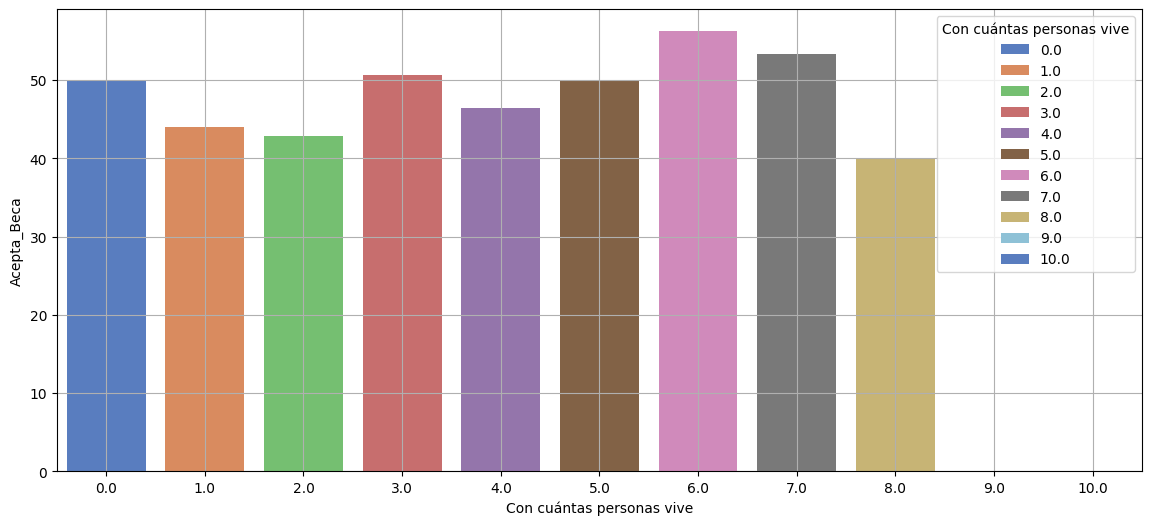

In [ ]:
graficar_tasa_beca('Con cuántas personas vive','y_bin',type='bar')

In [ ]:
df_Aceptados['Departamento de Residencia'] = df_Aceptados['Departamento de Residencia'].str.strip().str.upper()

df_Aceptados['Departamento de Residencia'] = df_Aceptados['Departamento de Residencia'].replace({
    'ANTIOQUÍA': 'ANTIOQUIA', 'ANTIOQUIA.': 'ANTIOQUIA', 'AANTIOQUIA': 'ANTIOQUIA', 'MEDELLÍN':'ANTIOQUIA', 'ANRIOQUIA':'ANTIOQUIA','AANTIOQUIA':'ANTIOQUIA',
    'ATLÁNTICO': 'ATLANTICO','DISTRITO CAPITAL': 'BOGOTÁ D.C.','BOGOTÁ': 'BOGOTÁ D.C.' ,'CHOCÓ':'CHOCO',
    'CORTES':'OTRO','BOLÍVAR':'BOLIVAR', 'CÓRDOBA':'CORDOBA',  'QUINDÍO':'QUINDIO', 'BOLÍVAR': 'BOLIVAR'

})

In [ ]:
# Crea una tabla agrupando por 'Depto residencia' y calcula el porcentaje de aceptación
tabla_depto = df_Aceptados.groupby('Departamento de Residencia')['y_bin'].mean().mul(100).reset_index(name='Porcentaje de Aceptación')

# Crear la tabla
tabla_ordenada = tabla_depto.sort_values(by='Porcentaje de Aceptación', ascending=False)
tabla_depto = PrettyTable()
tabla_depto.field_names = ['Departamento de Residencia', "Porcentaje de Aceptación"]

# Añadir filas a la tabla
for index, row in tabla_ordenada.iterrows():
    tabla_depto.add_row([row['Departamento de Residencia'], f"{row['Porcentaje de Aceptación']:.2f}%"])

# Mostrar la tabla
print(tabla_depto)



+----------------------------+--------------------------+
| Departamento de Residencia | Porcentaje de Aceptación |
+----------------------------+--------------------------+
|          QUINDIO           |          75.00%          |
| ARCHIPIELAGO DE SAN ANDRES |          60.00%          |
|           CALDAS           |          60.00%          |
|          CORDOBA           |          54.55%          |
|         SANTANDER          |          50.00%          |
|           BOYACÁ           |          50.00%          |
|            META            |          50.00%          |
|         ANTIOQUIA          |          48.94%          |
|           SUCRE            |          45.45%          |
|        CUNDINAMARCA        |          44.44%          |
|          CASANARE          |          42.86%          |
|         LA GUAJIRA         |          42.86%          |
|         ATLANTICO          |          40.91%          |
|           CESAR            |          38.46%          |
|           TO

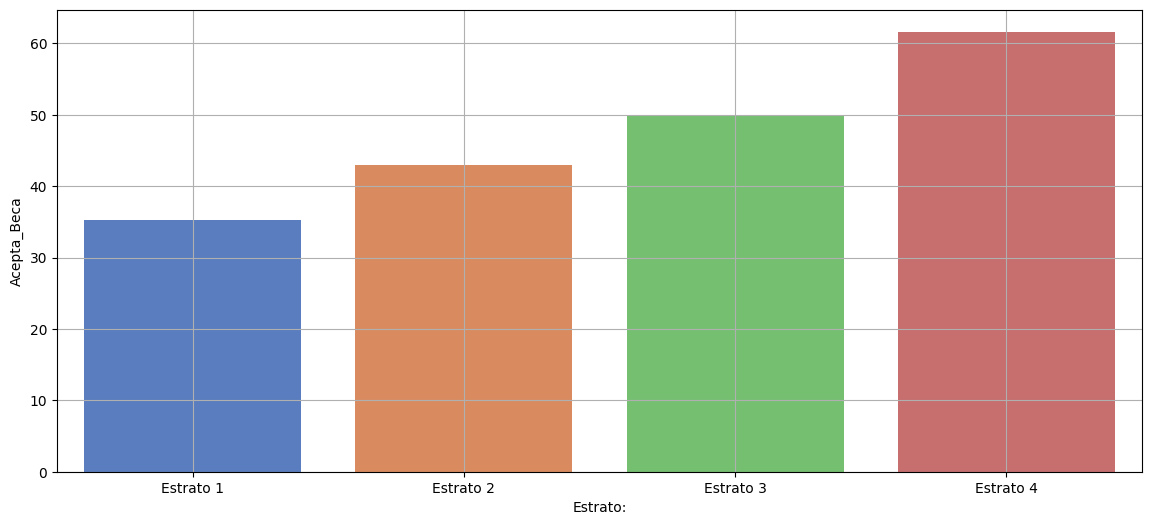

In [ ]:
graficar_tasa_beca('Estrato:','y_bin',type='bar')

- El estrato es una buena variable predictora , ya que muy claramente se observa que los estratos 3 y 4 son las que mas aceptan las becas

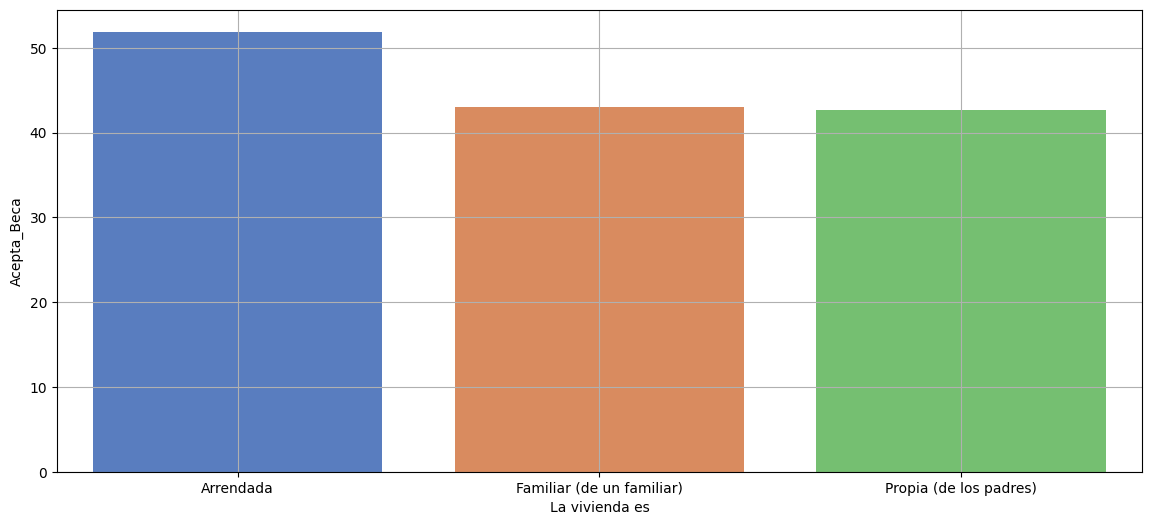

In [ ]:
graficar_tasa_beca('La vivienda es','y_bin',type='bar')

- 'La vivienda es' no es una variable que aporte mucho a la variable ya que son muy similares.

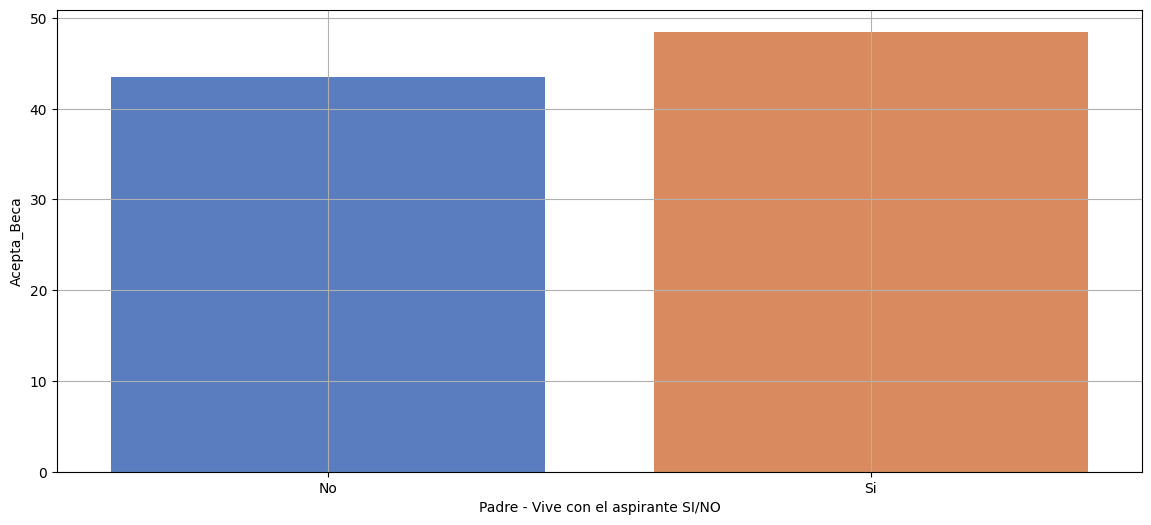

In [ ]:
graficar_tasa_beca('Padre - Vive con el aspirante SI/NO','y_bin',type='bar')


- Podemos eliminar las variables de "Padre - Vive con el aspirante SI/NO" o "Padre - Vive SI/NO" ya que sus valores son muy similares

In [ ]:
df_Aceptados.drop(columns=['Padre - Vive con el aspirante SI/NO'], inplace=True)

df_Aceptados.drop(columns=['Municipio IE'], inplace=True)
df_Aceptados.drop(columns=['Ciudad de Residencia'], inplace=True)
df_Aceptados.drop(columns=['Estado con la beca'], inplace=True)


In [ ]:
df_Aceptados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        1521 non-null   float64
 1   Sexo biológico              1521 non-null   object 
 2   Tipo de IE                  1521 non-null   object 
 3   Año graduación              1521 non-null   float64
 4   Dpto IE                     1521 non-null   object 
 5   Física -  10°               1521 non-null   object 
 6   Física -  11°               1521 non-null   object 
 7   Química -  10°              1521 non-null   object 
 8   Química -  11°              1521 non-null   object 
 9   Matemáticas - Grado 10°     1521 non-null   object 
 10  Matemáticas -  11°          1521 non-null   object 
 11  Lenguaje / Español 10°      1521 non-null   object 
 12  Lenguaje / Español 11°      1521 non-null   object 
 13  Puntaje Saber 11            1521 

In [ ]:
# Tasa de beca para dos columnas
def graficar_tb_bivariada(col_list, orden=None):
  tc = df_Aceptados.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1));

<ipython-input-151-e8d2190b1ced>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


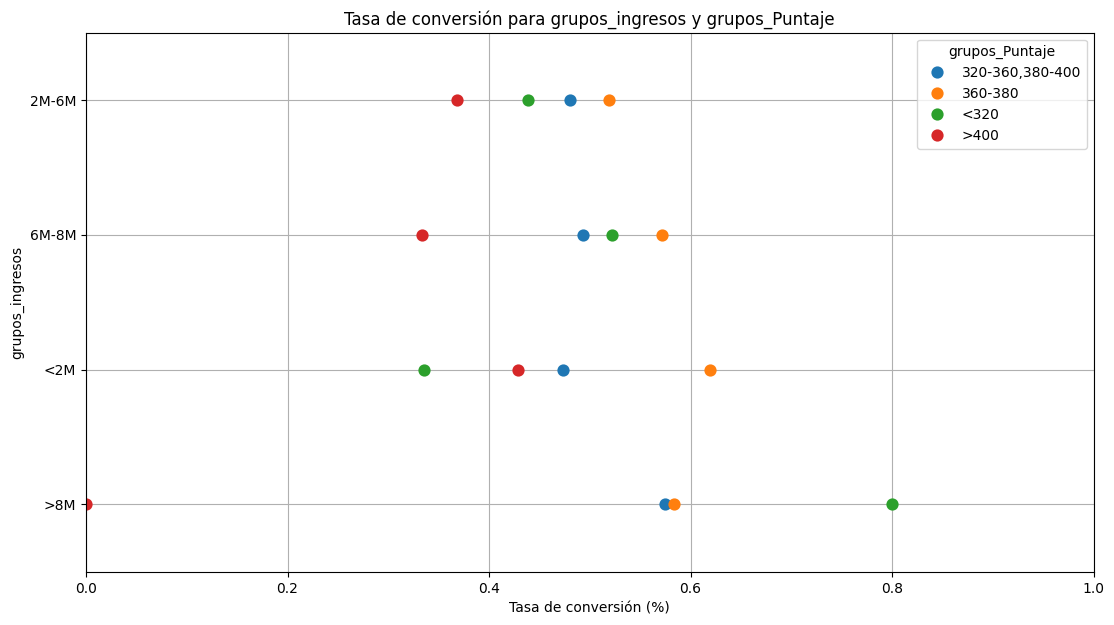

In [ ]:
# 1. Par poutcome-job
graficar_tb_bivariada(['grupos_ingresos','grupos_Puntaje'])

# mas 8M :Los aspirantes con puntaje alto mayo a 400 rechazan la beca, mientras los que aspirantes con puntaje bajo <320 tienden aceptar la beca con un 80%
# se puede ver en toda las escalas salariales que los aspirantes con puntajes >400 tienden a rechazar las becas.

In [ ]:
df_Aceptados.describe()

,Edad,Año graduación,Puntaje Saber 11,Con cuántas personas vive,Total ingresos padres,% beca aprobado final,Ingreso_Familiares,y_bin
count,1521.000000,1521.000000,1521.000000,1521.000000,1.521000e+03,1521.000000,1.521000e+03,1521.000000
mean,18.248632,2021.952663,337.775230,2.837607,3.616206e+06,0.547995,7.681393e+05,0.467456
std,2.016629,1.800327,25.651205,1.347241,2.985312e+06,0.181797,1.800983e+06,0.499104
min,15.000000,2001.000000,300.000000,0.000000,0.000000e+00,0.200000,0.000000e+00,0.000000
25%,17.000000,2022.000000,317.000000,2.000000,1.600000e+06,0.400000,0.000000e+00,0.000000
50%,18.000000,2023.000000,334.000000,3.000000,2.860750e+06,0.500000,0.000000e+00,0.000000
75%,18.901370,2023.000000,353.000000,4.000000,4.760000e+06,0.700000,1.060000e+06,1.000000
max,37.046575,2023.000000,441.000000,10.000000,2.500000e+07,1.000000,2.900000e+07,1.000000


In [ ]:
# Separar las variables numéricas
df_numericas = df_Aceptados.select_dtypes(include=['number'])

# Separar las variables categóricas
df_categoricas = df_Aceptados.select_dtypes(include=['object', 'category'])


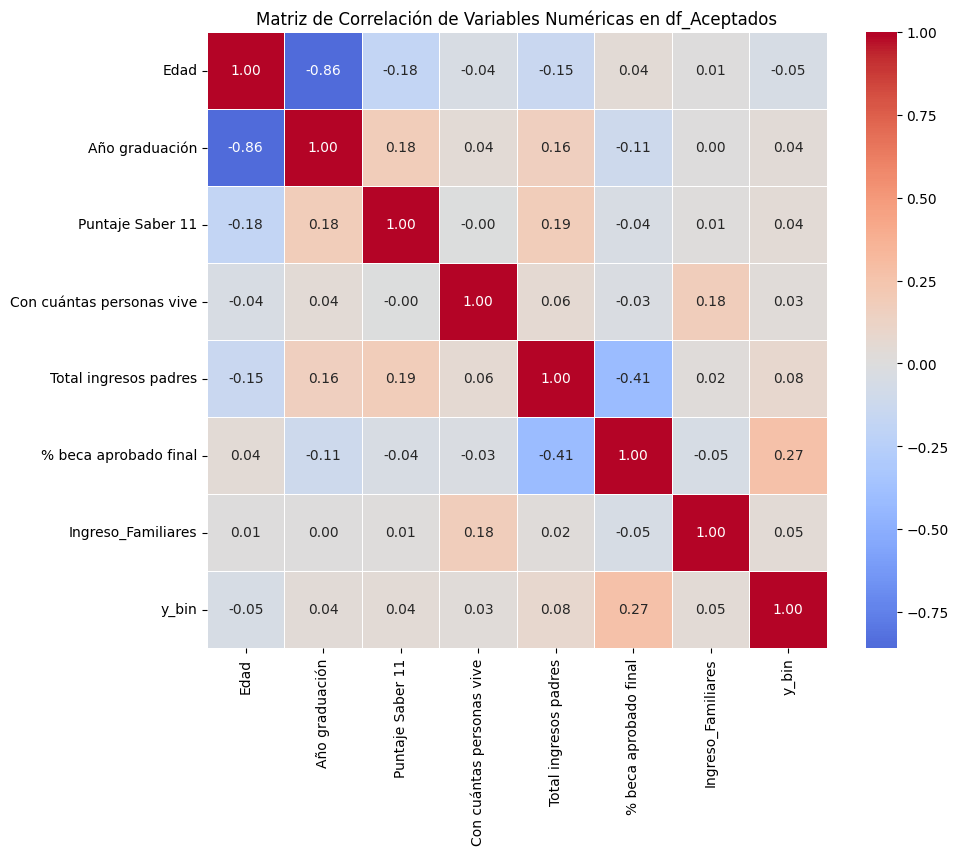

In [ ]:
# Calcular la matriz de correlación para las variables numéricas
correlacion = df_numericas.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Generar el mapa de calor con seaborn
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Numéricas en df_Aceptados')

# Mostrar el gráfico
plt.show()


In [ ]:
df_Aceptados['y_bin'].value_counts()


,count
y_bin,
0,810
1,711


In [ ]:
ruta = "/gdrive/MyDrive/Colab Notebooks/Trabajo-Grado/Data/df_Aceptados.xlsx"
df_Aceptados.to_excel(ruta, index=False)